In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import os
import random
import matrixprofile as mp
import matplotlib.gridspec as gridspec
from sklearn import preprocessing
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import statistics
from collections import Counter
import pyarrow as pa
import pyarrow.parquet as pq
import os
from collections import OrderedDict
from scipy import stats
sns.set_style("whitegrid")

In [2]:
tempTopDir = '/Volumes/Britt_SSD/ReDoEvals3/UserStudy/'
filePath = os.path.join(tempTopDir, 'GP_Main.parquet')

In [3]:
taskDF = pd.read_parquet(filePath)
taskDF['ParticipantNum'] = taskDF["ParticipantPrivateID"]
taskDF = taskDF.astype({"ParticipantPrivateID": str})
filePath = os.path.join(tempTopDir, 'GP_Main_Short.parquet')
slimDF = pd.read_parquet(filePath)

In [4]:
# randomiser_k74v = LVL
# randomiser_8rx4 = VisCond_DIFF
# randomiser_zcqq = VisCond_EASY


# randomiser_ndwh = AgentCond_BlurVis_DIFF
# randomiser_7vb5 = AgentCond_Blur_DIFF
# randomiser_fy7r = AgentCond_Vis_DIFF
# randomiser_vfim = AgentCond_Norm_DIFF

# randomiser_l6v8 = AgentCond_BlurVis_EASY
# randomiser_dwc2 = AgentCond_Blur_EASY
# randomiser_xnr7 = AgentCond_Vis_EASY
# randomiser_9z8b = AgentCond_Norm_EASY

In [5]:
lookup = taskDF[["VisCond_DIFF","VisCond_EASY"]].notnull().idxmax(1)
taskDF = taskDF.assign(VisCond=taskDF.lookup(lookup.index, lookup.values))
taskDF['VisCond']

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The 'lookup' method is deprecated and will beremoved in a future version.You can use DataFrame.melt and DataFrame.locas a substitute.
  


0        Blur_Plus_Vis
1        Blur_Plus_Vis
2        Blur_Plus_Vis
3        Blur_Plus_Vis
4        Blur_Plus_Vis
             ...      
75810          Blurred
75811          Blurred
75812          Blurred
75813          Blurred
75814          Blurred
Name: VisCond, Length: 75676, dtype: object

In [6]:
lookup = taskDF[["AgentCond_BlurVis_DIFF","AgentCond_Blur_DIFF","AgentCond_Vis_DIFF","AgentCond_Norm_DIFF",
                 "AgentCond_BlurVis_EASY","AgentCond_Blur_EASY","AgentCond_Vis_EASY","AgentCond_Norm_EASY"]].notnull().idxmax(1)
taskDF = taskDF.assign(AgentCond=taskDF.lookup(lookup.index, lookup.values))
taskDF['AgentCond']

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The 'lookup' method is deprecated and will beremoved in a future version.You can use DataFrame.melt and DataFrame.locas a substitute.
  This is separate from the ipykernel package so we can avoid doing imports until


0        300_700
1        300_700
2        300_700
3        300_700
4        300_700
          ...   
75810    300_700
75811    300_700
75812    300_700
75813    300_700
75814    300_700
Name: AgentCond, Length: 75676, dtype: object

In [7]:
filePath = os.path.join(tempTopDir, 'GP_Consent_Long.parquet')
consentDF_L = pd.read_parquet(filePath).infer_objects()
consentDF_L = consentDF_L.astype({"ParticipantPrivateID": str})
# drop rows where NAN in participant private id
consentDF_L = consentDF_L[consentDF_L['ParticipantPrivateID'].notna()]

filePath = os.path.join(tempTopDir, 'GP_Consent_Short.parquet')
consentDF_S = pd.read_parquet(filePath).infer_objects()
consentDF_S = consentDF_S.astype({"ParticipantPrivateID": str})
# drop rows where NAN in participant private id
consentDF_S = consentDF_S[consentDF_S['ParticipantPrivateID'].notna()]

filePath = os.path.join(tempTopDir, 'GP_Demographics_Long.parquet')
demoDF_L = pd.read_parquet(filePath).infer_objects()
demoDF_L = demoDF_L.astype({"ParticipantPrivateID": str})
# drop rows where NAN in participant private id
demoDF_L = demoDF_L[demoDF_L['ParticipantPrivateID'].notna()]

filePath = os.path.join(tempTopDir, 'GP_Demographics_Short.parquet')
demoDF_S = pd.read_parquet(filePath).infer_objects()
demoDF_S = demoDF_S.astype({"ParticipantPrivateID": str})
# drop rows where NAN in participant private id
demoDF_S = demoDF_S[demoDF_S['ParticipantPrivateID'].notna()]

filePath = os.path.join(tempTopDir, 'GP_AI_Long.parquet')
aiDF_L = pd.read_parquet(filePath).infer_objects()
aiDF_L = aiDF_L.astype({"ParticipantPrivateID": str})
# drop rows where NAN in participant private id
aiDF_L = aiDF_L[aiDF_L['ParticipantPrivateID'].notna()]

filePath = os.path.join(tempTopDir, 'GP_AI_Short.parquet')
aiDF_S = pd.read_parquet(filePath).infer_objects()
aiDF_S = aiDF_S.astype({"ParticipantPrivateID": str})
# drop rows where NAN in participant private id
aiDF_S = aiDF_S[aiDF_S['ParticipantPrivateID'].notna()]

In [8]:
demoDF_L.columns

Index(['EventIndex', 'UTCTimestamp', 'UTCDate', 'LocalTimestamp',
       'LocalTimezone', 'LocalDate', 'ExperimentID', 'ExperimentVersion',
       'TreeNodeKey', 'RepeatKey', 'ScheduleID', 'ParticipantPublicID',
       'ParticipantPrivateID', 'ParticipantStartingGroup', 'ParticipantStatus',
       'ParticipantCompletionCode', 'ParticipantExternalSessionID',
       'ParticipantDeviceType', 'ParticipantDevice', 'ParticipantOS',
       'ParticipantBrowser', 'ParticipantMonitorSize',
       'ParticipantViewportSize', 'Checkpoint', 'TaskName', 'TaskVersion',
       'randomiser_8rx4', 'randomiser_ndwh', 'randomiser_fy7r',
       'randomiser_7vb5', 'checkpoint_ph4w', 'checkpoint_drrq',
       'randomiser_vfim', 'checkpoint_6gsl', 'checkpoint_apgi',
       'randomiser_k74v', 'randomiser_zcqq', 'randomiser_9z8b',
       'randomiser_xnr7', 'randomiser_l6v8', 'randomiser_dwc2',
       'Randomisequestionnaireelements?', 'QuestionKey', 'Response',
       'branch_4zei', 'age_info', 'age_info_text', 

In [9]:
aiDF_S.columns

Index(['EventIndex', 'UTCTimestamp', 'UTCDate', 'LocalTimestamp',
       'LocalTimezone', 'LocalDate', 'ExperimentID', 'ExperimentVersion',
       'TreeNodeKey', 'RepeatKey', 'ScheduleID', 'ParticipantPublicID',
       'ParticipantPrivateID', 'ParticipantStartingGroup', 'ParticipantStatus',
       'ParticipantCompletionCode', 'ParticipantExternalSessionID',
       'ParticipantDeviceType', 'ParticipantDevice', 'ParticipantOS',
       'ParticipantBrowser', 'ParticipantMonitorSize',
       'ParticipantViewportSize', 'Checkpoint', 'TaskName', 'TaskVersion',
       'randomiser_8rx4', 'randomiser_ndwh', 'randomiser_fy7r',
       'randomiser_7vb5', 'checkpoint_ph4w', 'checkpoint_drrq',
       'randomiser_vfim', 'checkpoint_6gsl', 'checkpoint_apgi',
       'randomiser_k74v', 'randomiser_zcqq', 'randomiser_9z8b',
       'randomiser_xnr7', 'randomiser_l6v8', 'randomiser_dwc2',
       'Randomisequestionnaireelements?', 'ai_involvement_1',
       'ai_involvement_2', 'ai_involvement_3', 'ai_involve

In [10]:
len(demoDF_L.ParticipantPrivateID.unique())

246

In [11]:
len(taskDF.ParticipantPrivateID.unique())

245

In [12]:
taskDF.columns

Index(['EventIndex', 'UTCTimestamp', 'UTCDate', 'LocalTimestamp',
       'LocalTimezone', 'LocalDate', 'ExperimentID', 'ExperimentVersion',
       'TreeNodeKey', 'RepeatKey', 'ScheduleID', 'ParticipantPublicID',
       'ParticipantPrivateID', 'ParticipantStartingGroup', 'ParticipantStatus',
       'ParticipantCompletionCode', 'ParticipantExternalSessionID',
       'ParticipantDeviceType', 'ParticipantDevice', 'ParticipantOS',
       'ParticipantBrowser', 'ParticipantMonitorSize',
       'ParticipantViewportSize', 'Checkpoint', 'TaskName', 'TaskVersion',
       'VisCond_DIFF', 'AgentCond_BlurVis_DIFF', 'AgentCond_Vis_DIFF',
       'AgentCond_Blur_DIFF', 'checkpoint_ph4w', 'checkpoint_drrq',
       'AgentCond_Norm_DIFF', 'checkpoint_6gsl', 'checkpoint_apgi', 'LVL',
       'VisCond_EASY', 'AgentCond_Norm_EASY', 'AgentCond_Vis_EASY',
       'AgentCond_BlurVis_EASY', 'AgentCond_Blur_EASY', 'Spreadsheet',
       'SpreadsheetName', 'SpreadsheetRow', 'TrialNumber', 'ScreenNumber',
       'Scre

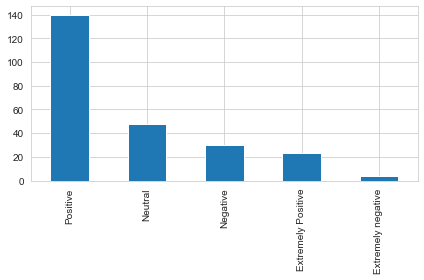

In [13]:
datamap = {
    1: "Extremely negative", 
    2: "Negative", 
    3: "Neutral", 
    4: "Positive", 
    5: "Extremely Positive"
}


aiDF_S['AIrating'] = aiDF_S.ai_opinion_quantised.map(datamap.get)
slimDF['AIrating'] = slimDF.ai_opinion_quantised.map(datamap.get)

fig, ax = plt.subplots()
aiDF_S.AIrating.value_counts().plot(kind='bar', ax=ax)
## alternatively:
# aiDF_S.groupby(by='AIrating').count().plot(kind='bar', ax=ax)
fig.tight_layout()


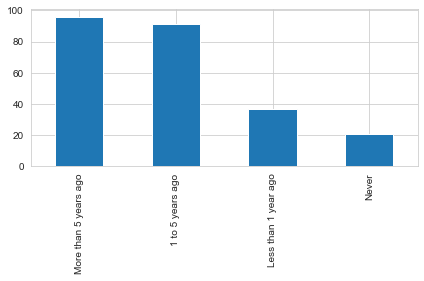

In [14]:
datamap = {
    1: "Less than 1 year ago",  
    2: "1 to 5 years ago",  
    3: "More than 5 years ago",  
    4: "Never"
}


aiDF_S['PMrating'] = aiDF_S.pacman_experience_quantised.map(datamap.get)

fig, ax = plt.subplots()
aiDF_S.PMrating.value_counts().plot(kind='bar', ax=ax)
## alternatively:
# aiDF_S.groupby(by='AIrating').count().plot(kind='bar', ax=ax)
fig.tight_layout()

F            121
M            121
No Answer      1
Name: gender_rating, dtype: int64


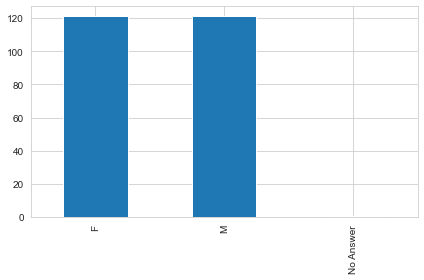

In [15]:
datamap = {
    1: "M",  
    2: "F",  
    3: "No Answer",  
    4: "Other"
}


demoDF_S['gender_rating'] = demoDF_S.gender_id_quantised.map(datamap.get)

print(demoDF_S.gender_rating.value_counts())

fig, ax = plt.subplots()
demoDF_S.gender_rating.value_counts().plot(kind='bar', ax=ax)
## alternatively:
# aiDF_S.groupby(by='AIrating').count().plot(kind='bar', ax=ax)
fig.tight_layout()

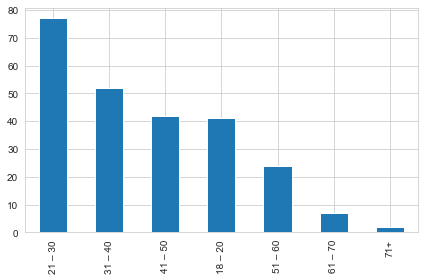

In [16]:
datamap = {
    1: "18 – 20",  
    2: '21 – 30',   
    3: '31 – 40',   
    4: '41 – 50',  
    5: '51 – 60', 
    6: '61 – 70',  
    7: '71+'
}


demoDF_S['age_rating'] = demoDF_S.age_info_quantised.map(datamap.get)

fig, ax = plt.subplots()
demoDF_S.age_rating.value_counts().plot(kind='bar', ax=ax)
## alternatively:
# aiDF_S.groupby(by='AIrating').count().plot(kind='bar', ax=ax)
fig.tight_layout()

<AxesSubplot:>

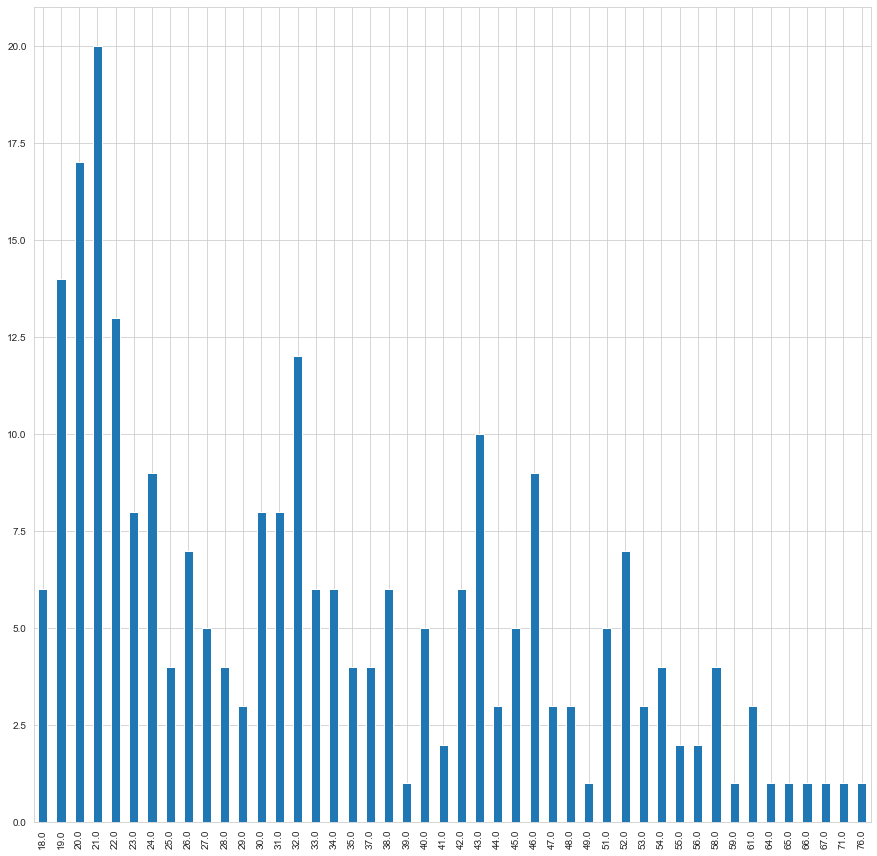

In [17]:
slimDF['age'].astype(int)
fig, ax = plt.subplots()
pd.value_counts(slimDF.age).sort_index(axis=0).plot(kind="bar", figsize=(15,15), ax=ax)

gender_rating     F     M  No Answer
age_rating                          
18 – 20        24.0  29.0        NaN
21 – 30        84.0  32.0        3.0
31 – 40        64.0  20.0        NaN
41 – 50        44.0  20.0        NaN
51 – 60        20.0  14.0        NaN
61 – 70         6.0   4.0        NaN
71+             NaN   2.0        NaN
gender_rating     F     M  No Answer
age_rating                          
18 – 20        12.0  29.0        NaN
21 – 30        84.0  64.0        2.0
31 – 40        96.0  60.0        NaN
41 – 50        88.0  80.0        NaN
51 – 60        50.0  70.0        NaN
61 – 70        18.0  24.0        NaN
71+             NaN  14.0        NaN


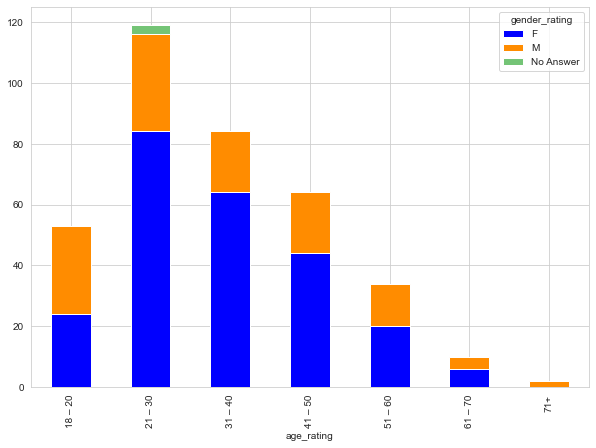

In [18]:

colors = ["blue","darkorange", "#74C476"]
df = demoDF_S.groupby(['age_rating','gender_rating']).sum().unstack().add_prefix('')
print(df['gender_id_quantised'])
print(df['age_info_quantised'])
df['gender_id_quantised'].plot(kind="bar",stacked=True, figsize=(10,7), color=colors)
plt.savefig('/Users/byrdsmyth/iCloud/Documents/School/Thesis/WSU_Thesis_Latex/Figures/AgeGenderGraph.png')
plt.show()
# df['param_age_info_quantised'].plot(kind="bar",stacked=True, figsize=(10,7), color=colors)

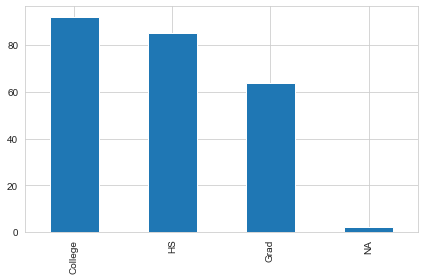

In [19]:
datamap = {
    1: "HS",  
    2: "College",   
    3: "Grad",   
    4: "NA",  
    5: "Other"
}


demoDF_S['edu_rating'] = demoDF_S.education_level_quantised.map(datamap.get)
a
fig, ax = plt.subplots()
demoDF_S.edu_rating.value_counts().plot(kind='hist', ax=ax)
## alternatively:
# aiDF_S.groupby(by='AIrating').count().plot(kind='bar', ax=ax)
fig.tight_layout()

[None 'I videos about using and implementing AI' 'Informal interest']


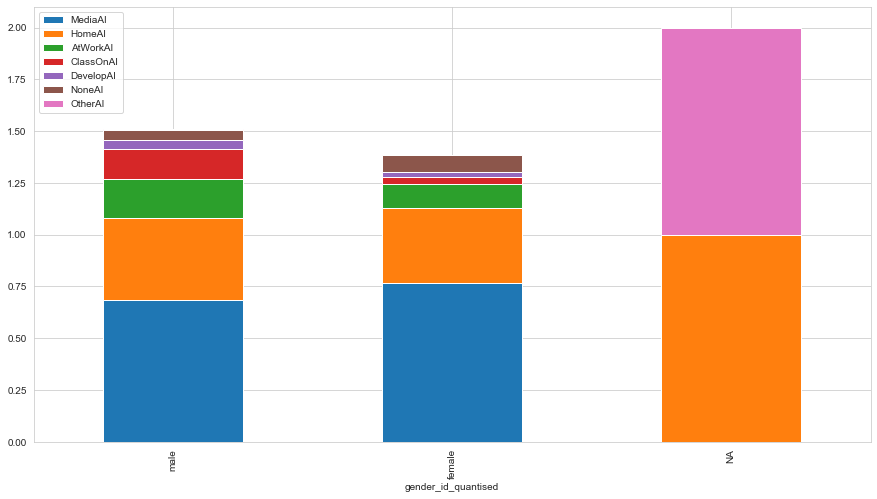

In [20]:
tmp = slimDF[['MediaAI','HomeAI','AtWorkAI','ClassOnAI','ai_involvement_4','DevelopAI','NoneAI','OtherAI','gender_id_quantised']]

ax = tmp.groupby('gender_id_quantised').mean().plot(kind="bar", stacked=True, figsize=(15,8))
ax.set_xticklabels(['male','female','NA'])

print(slimDF.ai_involvement_text.unique())

In [21]:
# From: https://benalexkeen.com/comparative-statistics-in-python-using-scipy/

# Our null hypothesis in this case is that there is no statistically significant difference in the mean of 
# male consulting doctors and junior resident female doctors.

# thisDF = tmp_slimDF.copy()

print(slimDF.visuals.unique())
Blur_Plus_Vis = slimDF[slimDF['visuals']=='Blur_Plus_Vis'] 
Visuals =  slimDF[slimDF['visuals']=='Visuals'] 
Blurred =  slimDF[slimDF['visuals']=='Blurred'] 
Video = slimDF[slimDF['visuals']=='Video'] 

print("Vis v BlurVis")
print(stats.ttest_ind(Blur_Plus_Vis['totPerc'], Visuals['totPerc']))
print("BlurVis v Blur")
print(stats.ttest_ind(Blur_Plus_Vis['totPerc'], Blurred['totPerc']))
print("Vid v BlurVis")
print(stats.ttest_ind(Blur_Plus_Vis['totPerc'], Video['totPerc']))
print("Vis v Blur")
print(stats.ttest_ind(Visuals['totPerc'], Blurred['totPerc']))
print("Vis v Vid")
print(stats.ttest_ind(Visuals['totPerc'], Video['totPerc']))
print("Vid v BlurVis")
print(stats.ttest_ind(Blurred['totPerc'], Video['totPerc']))

['Blur_Plus_Vis' 'Visuals' 'Blurred' 'Video']
Vis v BlurVis
Ttest_indResult(statistic=-4.369772786566169, pvalue=2.6293688711165965e-05)
BlurVis v Blur
Ttest_indResult(statistic=3.3526711721968936, pvalue=0.001066331943882316)
Vid v BlurVis
Ttest_indResult(statistic=0.8933613770669752, pvalue=0.37340828004142423)
Vis v Blur
Ttest_indResult(statistic=7.747436336056429, pvalue=3.106011828128417e-12)
Vis v Vid
Ttest_indResult(statistic=5.435670254616618, pvalue=2.812165046906448e-07)
Vid v BlurVis
Ttest_indResult(statistic=-2.6416492706897303, pvalue=0.009321695420335594)


In [22]:
print("Vis v BlurVis")
print(stats.ttest_rel(Blur_Plus_Vis['totPerc'], Visuals['totPerc']))
print("BlurVis v Blur")
print(stats.ttest_rel(Blur_Plus_Vis['totPerc'], Blurred['totPerc']))
# print("Vid v BlurVis")
# print(stats.ttest_rel(Blur_Plus_Vis['totPerc'], Video['totPerc']))
print("Vis v Blur")
print(stats.ttest_rel(Visuals['totPerc'], Blurred['totPerc']))
# print("Vis v Vid")
# print(stats.ttest_rel(Visuals['totPerc'], Video['totPerc']))
# print("Vid v BlurVis")
# print(stats.ttest_rel(Blurred['totPerc'], Video['totPerc']))

Vis v BlurVis
Ttest_relResult(statistic=-4.162195877979567, pvalue=0.00010052478937654634)
BlurVis v Blur
Ttest_relResult(statistic=3.5613338504287833, pvalue=0.0007225597983077951)
Vis v Blur
Ttest_relResult(statistic=8.02537424439837, pvalue=3.9780233544316395e-11)


In [23]:
# While you could do multiple T-tests, as you increase the numbers of T-tests you do, you are more likely to 
# encounter a Type I error. If you have a p value of 0.05 for each T-test, once you have run three T-tests, 
# your p is effectively 0.143. ANOVA controls for this error such that the Type I error rate remains at 5%.
print(stats.f_oneway(Blur_Plus_Vis['totPerc'], Visuals['totPerc'],Blurred['totPerc'], Video['totPerc']))

print(stats.f_oneway(Visuals['totPerc'],Blurred['totPerc'], Video['totPerc']))

print(stats.f_oneway(Blur_Plus_Vis['totPerc'], Visuals['totPerc'],Blurred['totPerc']))

F_onewayResult(statistic=22.96539433027693, pvalue=3.9015131079899815e-13)
F_onewayResult(statistic=35.00390972257761, pvalue=1.310110057261779e-13)
F_onewayResult(statistic=30.725081504317338, pvalue=3.1250675203720124e-12)


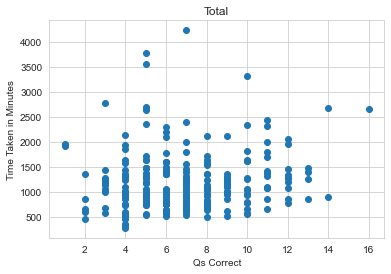

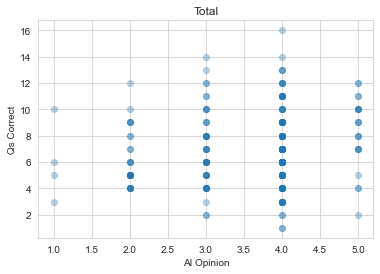

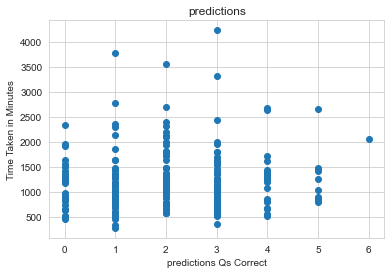

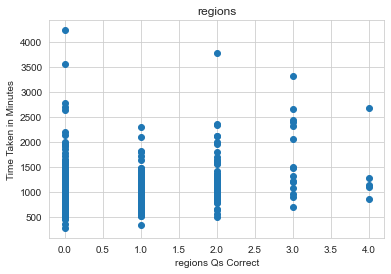

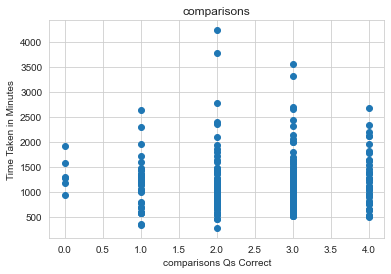

In [24]:


plt.scatter('QsCorrect','timeTakenMain_AgentsOnly',data=slimDF)
plt.title("Total")
plt.ylabel("Time Taken in Minutes")
plt.xlabel("Qs Correct")
plt.show()

plt.scatter('ai_opinion_quantised','QsCorrect',data=slimDF, alpha=0.3)
plt.title("Total")
plt.xlabel("AI Opinion")
plt.ylabel("Qs Correct")
plt.show()

plt.scatter('predictionsCorrect','timeTakenMain_AgentsOnly',data=slimDF)
plt.title("predictions")
plt.ylabel("Time Taken in Minutes")
plt.xlabel("predictions Qs Correct")
plt.show()

plt.scatter('regionsCorrect','timeTakenMain_AgentsOnly',data=slimDF)
plt.title("regions")
plt.ylabel("Time Taken in Minutes")
plt.xlabel("regions Qs Correct")
plt.show()

plt.scatter('comparisonsCorrect','timeTakenMain_AgentsOnly',data=slimDF)
plt.title("comparisons")
plt.ylabel("Time Taken in Minutes")
plt.xlabel("comparisons Qs Correct")
plt.show()




/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


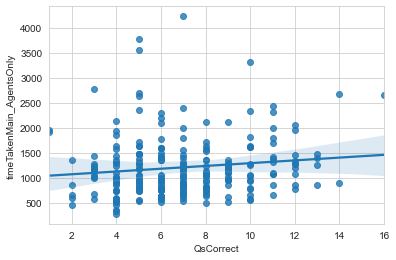

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


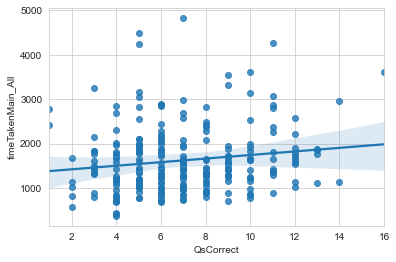

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


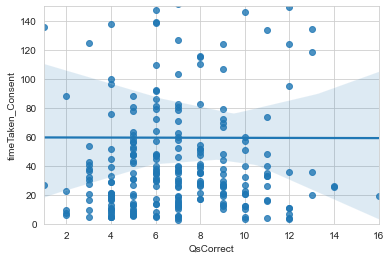

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


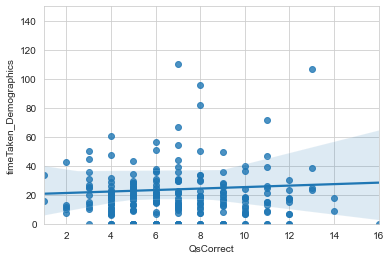

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


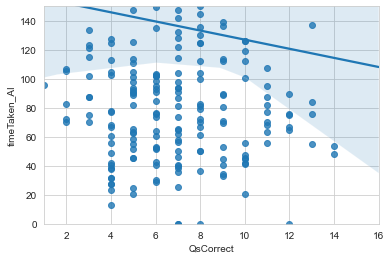

In [25]:
# https://www.statology.org/plot-confidence-interval-python/

sns.regplot('QsCorrect','timeTakenMain_AgentsOnly',data=slimDF, ci=100)
plt.show()

sns.regplot('QsCorrect','timeTakenMain_All',data=slimDF, ci=100)
plt.show()

sns.regplot('QsCorrect','timeTaken_Consent',data=slimDF, ci=100)
plt.ylim((0,150))
plt.show()

sns.regplot('QsCorrect','timeTaken_Demographics',data=slimDF, ci=100)
plt.ylim((0,150))
plt.show()

sns.regplot('QsCorrect','timeTaken_AI',data=slimDF, ci=100)
plt.ylim((0,150))
plt.show()

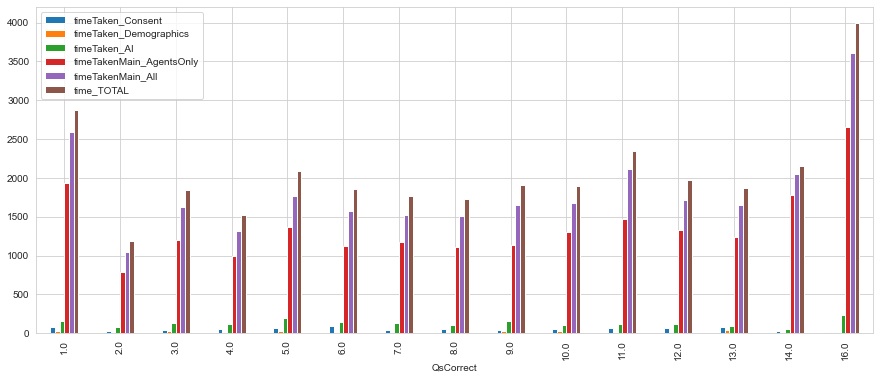

In [26]:
tmp = slimDF[['timeTaken_Consent','timeTaken_Demographics','timeTaken_AI','timeTakenMain_AgentsOnly','timeTakenMain_All','time_TOTAL','QsCorrect']]

ax = tmp.groupby('QsCorrect').mean().plot(kind="bar", figsize=(15,6))
# ax.set_xticklabels(['male','female'])

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


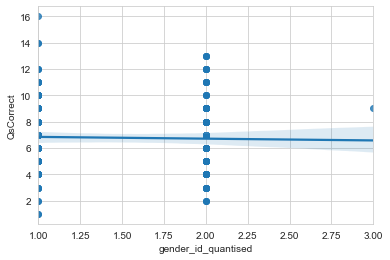

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


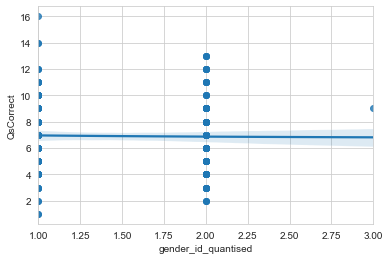

In [27]:
# https://www.statology.org/plot-confidence-interval-python/

# sns.regplot('QsCorrect','gender_id_quantised',data=slimDF, ci=90, logistic=True, logx=True, robust=True)
# plt.show()

sns.regplot('gender_id_quantised','QsCorrect',data=slimDF, ci=90, robust=True)
plt.show()

sns.regplot('gender_id_quantised','QsCorrect',data=slimDF, ci=90, logx=True)
plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


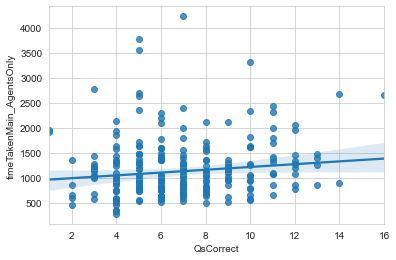

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


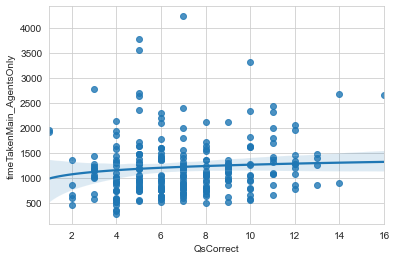

In [28]:
sns.regplot('QsCorrect','timeTakenMain_AgentsOnly',data=slimDF, ci=99, robust=True)
plt.show()

sns.regplot('QsCorrect','timeTakenMain_AgentsOnly',data=slimDF, ci=99, logx=True)
plt.show()

In [29]:
# slimDF['totPerc'] = (slimDF['QsCorrect']/slimDF['QsTotal']) * 100
# slimDF['predPerc'] = (slimDF['predictionsCorrect']/slimDF['predictionsTotal']) * 100
# slimDF['regPerc'] = (slimDF['regionsCorrect']/slimDF['regionsTotal']) * 100
# slimDF['lvlPerc'] = (slimDF['levelCorrect']/slimDF['levelTotal']) * 100
# slimDF['ghostPerc'] = (slimDF['ghostsCorrect']/slimDF['ghostsTotal']) * 100
# slimDF['compPerc'] = (slimDF['comparisonsCorrect']/slimDF['comparisonsTotal']) * 100

# print("\nMean Percent Correct")
# print(slimDF['totPerc'].mean())
# print("Mean Percent Std")
# print(slimDF['totPerc'].std())

# print("\nMean Percent Predictions Correct")
# print(slimDF['predPerc'].mean())
# print("Mean Percent Predictions Std")
# print(slimDF['predPerc'].std())

# print("\nMean Percent Regions Correct")
# print(slimDF['regPerc'].mean())
# print("Mean Percent Regions Std")
# print(slimDF['regPerc'].std())

# print("\nMean Percent Level Correct")
# print(slimDF['lvlPerc'].mean())
# print("Mean Percent Level Std")
# print(slimDF['lvlPerc'].std())

# print("\nMean Percent Ghosts Correct")
# print(slimDF['ghostPerc'].mean())
# print("Mean Percent Ghosts Std")
# print(slimDF['ghostPerc'].std())

# print("\nMean Percent Comparisons Correct")
# print(slimDF['compPerc'].mean())
# print("Mean Percent Comparisons Std")
# print(slimDF['compPerc'].std())

# for i in slimDF.visuals.unique():
#     temp = slimDF[slimDF['visuals']==i]
#     print("\n" + str(i) + ".....................................")
#     print("\nMean Percent Correct")
#     print(temp['totPerc'].mean())
#     print("Mean Percent Std")
#     print(temp['totPerc'].std())
#     print("\nMean 1st half Percent Correct")
#     print(temp['tot1Perc'].mean())
#     print("\nMean 2nd half Percent Correct")
#     print(temp['tot2Perc'].mean())

#     print("\nMean Percent Predictions Correct")
#     print(temp['predPerc'].mean())
#     print("Mean Percent Predictions Std")
#     print(temp['predPerc'].std()) 
#     print("\nMean 1st half Percent Predictions Correct")
#     print(temp['pred1Perc'].mean())
#     print("\nMean 2nd half Percent Predictions Correct")
#     print(temp['pred2Perc'].mean())

#     print("\nMean Percent Regions Correct")
#     print(temp['regPerc'].mean())
#     print("Mean Percent Regions Std")
#     print(temp['regPerc'].std())
#     print("\nMean 1st half Percent Regions Correct")
#     print(temp['reg1Perc'].mean())
#     print("\nMean 2nd half Percent Regions Correct")
#     print(temp['reg2Perc'].mean())

#     print("\nMean Percent Level Correct")
#     print(temp['lvlPerc'].mean())
#     print("Mean Percent Level Std")
#     print(temp['lvl1Perc'].std())
#     print("\nMean 1st half Percent Level Correct")
#     print(temp['lvl2Perc'].mean())
#     print("\nMean 2nd half Percent Level Correct")
#     print(temp['lvlPerc'].mean())

#     print("\nMean Percent Ghosts Correct")
#     print(temp['ghostPerc'].mean())
#     print("Mean Percent Ghosts Std")
#     print(temp['ghostPerc'].std())
#     print("\nMean 1st half Percent Ghosts Correct")
#     print(temp['ghost1Perc'].mean())
#     print("\nMean 2nd half Percent Ghosts Correct")
#     print(temp['ghost2Perc'].mean())

#     print("\nMean Percent Comparisons Correct")
#     print(temp['compPerc'].mean())
#     print("Mean Percent Comparisons Std")
#     print(temp['compPerc'].std())

In [30]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [32]:
# Toy use of above fxn
import scipy
print("Time")
print(mean_confidence_interval(slimDF['timeTakenMain_All']))
print("1")
print(mean_confidence_interval(slimDF['tot1Perc']))
print("2")
print(mean_confidence_interval(slimDF['tot2Perc']))

Time
(1618.101080321285, 1525.6595152880445, 1710.5426453545256)
1
(27.10843373493976, 24.808488107057418, 29.4083793628221)
2
(27.40963855421687, 25.1186055808148, 29.700671527618937)


In [33]:
print("All main")
print(slimDF['timeTakenMain_All'].mean())
print(slimDF['timeTakenMain_All'].std())

print((slimDF['timeTakenMain_All'].mean() - (2 * slimDF['timeTakenMain_All'].std()))/60)

print("Agents main")
print(slimDF['timeTakenMain_AgentsOnly'].mean())
print(slimDF['timeTakenMain_AgentsOnly'].std())

print((slimDF['timeTakenMain_AgentsOnly'].mean() - (2 * slimDF['timeTakenMain_AgentsOnly'].std()))/60)

print("All")
print(slimDF['time_TOTAL'].mean())
print(slimDF['time_TOTAL'].std())

print((slimDF['time_TOTAL'].mean() - (2 * slimDF['time_TOTAL'].std()))/60)

All main
1618.1010803212846
740.6180560331514
2.281082804249695
Agents main
1205.13297188755
582.3776055475325
0.672962679874748
All
1867.7670080321295
858.5552177779728
2.510942874603067


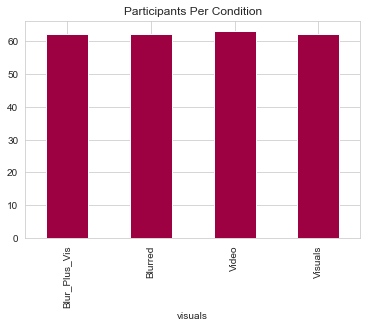

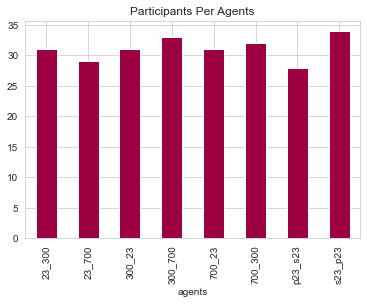

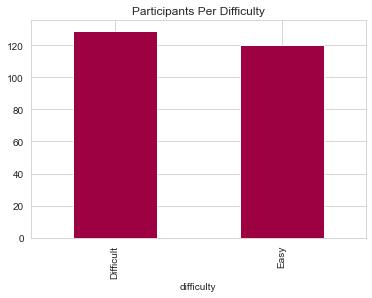

                       Spreadsheet  ParticipantPrivateID
1     PP_23_VS_STD_23_Blur_and_Vis                     5
17    STD_23_VS_PP_23_Blur_and_Vis                     6
21   STD_23_VS_PP_700_Blur_and_Vis                     6
30        STD_300_VS_PP_700_Normal                     7
14        PP_700_VS_STD_300_Normal                     7
22         STD_23_VS_PP_700_Normal                     7
23            STD_23_VS_PP_700_Vis                     7
10         PP_700_VS_STD_23_Normal                     7
25   STD_300_VS_PP_23_Blur_And_Vis                     7
27            STD_300_VS_PP_23_Vis                     7
5    PP_23_VS_STD_300_Blur_and_Vis                     7
4            PP_23_VS_STD_300_Blur                     7
3              PP_23_VS_STD_23_Vis                     7
20           STD_23_VS_PP_700_Blur                     7
24           STD_300_VS_PP_23_Blur                     8
26         STD_300_VS_PP_23_Normal                     8
28          STD_300_VS_PP_700_B

<AxesSubplot:title={'center':'Participants Per Spreadsheet'}>

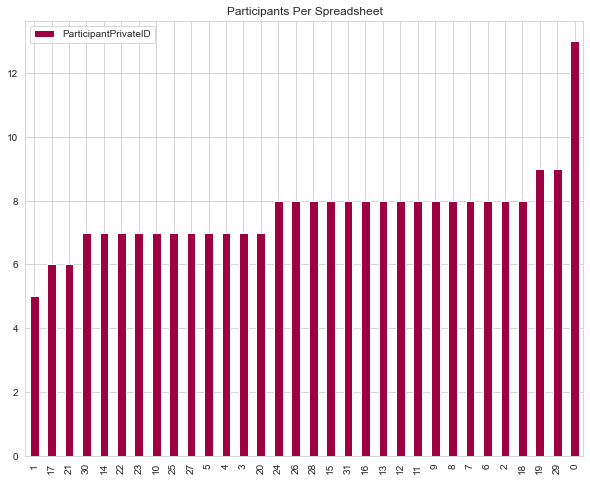

In [34]:
grouped_df = slimDF.groupby("visuals").size()

grouped_df.plot(kind="bar", title="Participants Per Condition", colormap="Spectral", stacked=True)
plt.show()

grouped_df = slimDF.groupby("agents").size()

grouped_df.plot(kind="bar", title="Participants Per Agents", colormap="Spectral", stacked=True)
plt.show()

grouped_df = slimDF.groupby("difficulty").size()

grouped_df.plot(kind="bar", title="Participants Per Difficulty", colormap="Spectral", stacked=True)
plt.show()

grouped_df = taskDF.groupby("Spreadsheet")
grouped_df = grouped_df.agg({"ParticipantPrivateID": "nunique"})
grouped_df = grouped_df.reset_index()
grouped_df = grouped_df.sort_values('ParticipantPrivateID')
print(grouped_df)

grouped_df.plot(kind="bar", title="Participants Per Spreadsheet", colormap="Spectral", stacked=True, figsize=(10,8))
# plt.show()

visuals
Blur_Plus_Vis    34.112903
Blurred          27.258065
Video            32.222222
Visuals          45.000000
Name: totPerc, dtype: float64
visuals
Blur_Plus_Vis    12.627195
Blurred           9.986771
Video            10.990384
Visuals          15.013655
Name: totPerc, dtype: float64


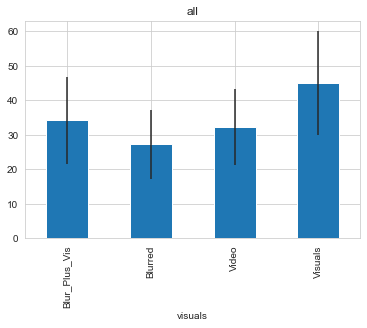

visuals
Blur_Plus_Vis    23.387097
Blurred          20.161290
Video            25.793651
Visuals          39.112903
Name: tot1Perc, dtype: float64
visuals
Blur_Plus_Vis    17.747643
Blurred          14.555370
Video            15.533687
Visuals          19.923505
Name: tot1Perc, dtype: float64


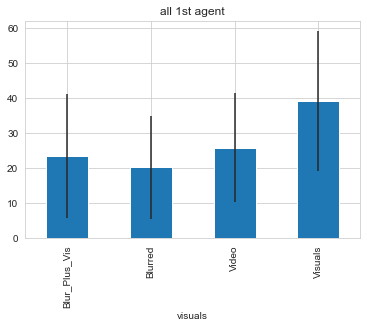

visuals
Blur_Plus_Vis    28.427419
Blurred          19.354839
Video            22.420635
Visuals          39.516129
Name: tot2Perc, dtype: float64
visuals
Blur_Plus_Vis    20.011441
Blurred          12.938501
Video            14.918922
Visuals          18.275211
Name: tot2Perc, dtype: float64


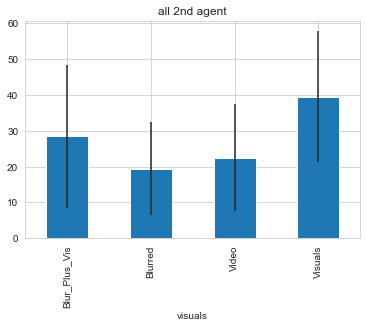

No handles with labels found to put in legend.


    1stAgent   2ndAgent
0  23.387097  28.427419
1  20.161290  19.354839
2  25.793651  22.420635
3  39.112903  39.516129
                 0          1          2          3
errors1  17.747643  14.555370  15.533687  19.923505
errors2  20.011441  12.938501  14.918922  18.275211


<AxesSubplot:title={'center':'Both Agents'}>

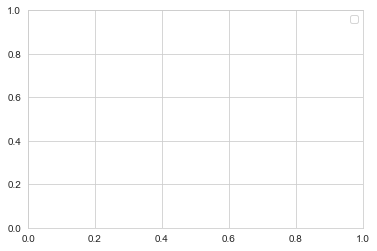

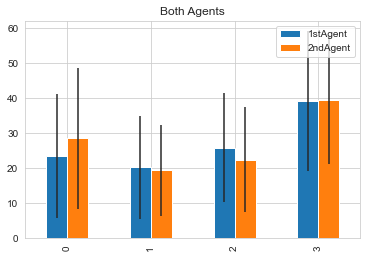

In [35]:
temp = slimDF.set_index('visuals')

means = temp.groupby(level='visuals')['totPerc'].mean()
print(means)
errors = temp.groupby(level='visuals')['totPerc'].std()
print(errors)
means.plot(kind ='bar', yerr = errors, title = "all")
plt.show()

means = temp.groupby(level='visuals')['tot1Perc'].mean()
print(means)
errors = temp.groupby(level='visuals')['tot1Perc'].std()
print(errors)
means.plot(kind ='bar', yerr = errors, title = "all 1st agent")
plt.show()

means = temp.groupby(level='visuals')['tot2Perc'].mean()
print(means)
errors = temp.groupby(level='visuals')['tot2Perc'].std()
print(errors)
means.plot(kind ='bar', yerr = errors, title = "all 2nd agent")
plt.show()

means1 = temp.groupby(level='visuals')['tot1Perc'].mean()
means2 = temp.groupby(level='visuals')['tot2Perc'].mean()

df1 = pd.DataFrame(list(zip(means1, means2)),columns=['1stAgent','2ndAgent'])
print(df1)

errors1 = temp.groupby(level='visuals')['tot1Perc'].std()
errors2 = temp.groupby(level='visuals')['tot2Perc'].std()
df2 = pd.DataFrame(list(zip(errors1, errors2)),columns=['errors1','errors2'])
print(df2.T)
plt.legend(loc="best")
df1.plot(kind="bar", yerr=df2[['errors1','errors2']].values.T, title="Both Agents")


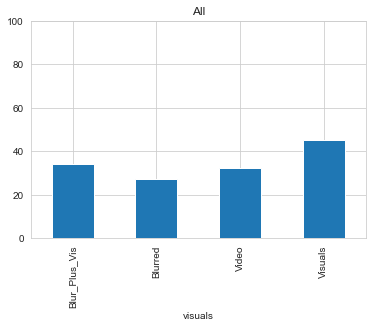

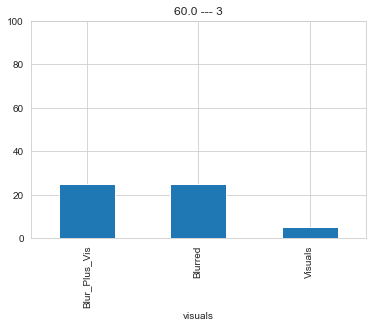

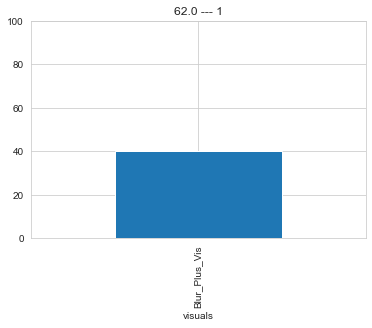

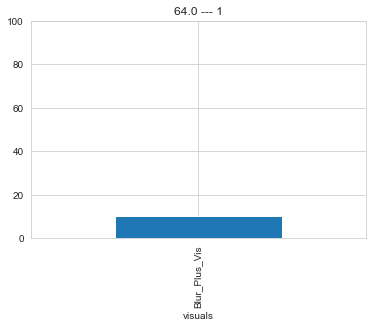

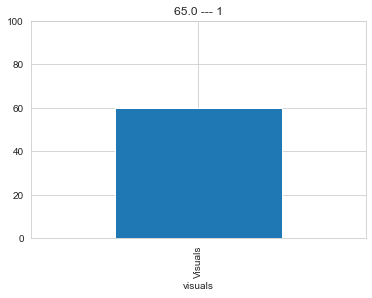

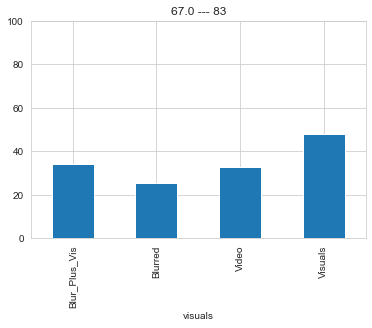

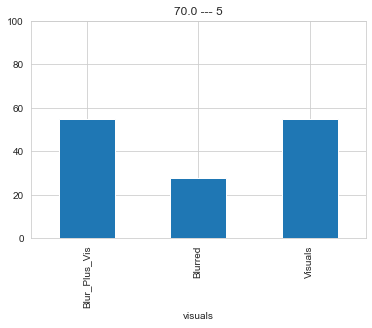

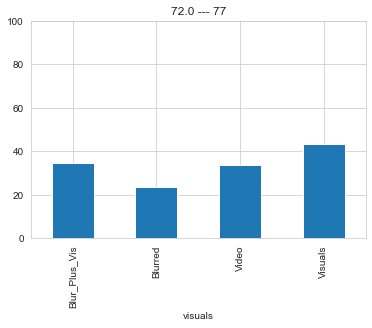

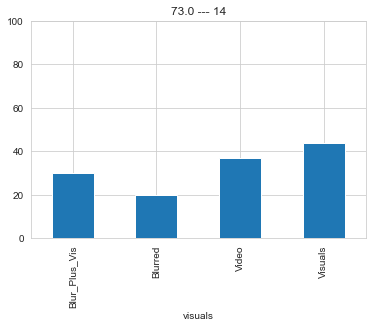

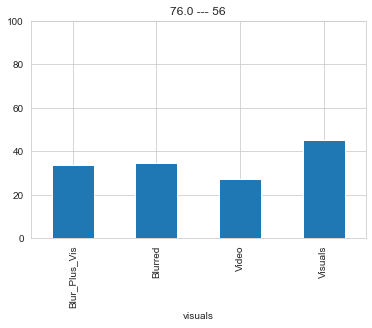

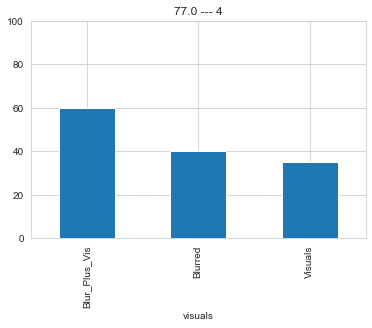

In [36]:
slimDF.groupby('visuals')['totPerc'].mean().plot(kind="bar", title="Average Total Correct")
plt.title("All")
plt.ylim((0,100))
plt.show()

for v_index, version in enumerate(slimDF.ExperimentVersion.unique()):
    temp = slimDF[slimDF['ExperimentVersion']==version]
    
    temp.groupby('visuals')['totPerc'].mean().plot(kind="bar", title="Average Total Correct")
    plt.title(str(version) + " --- " + str(len(temp.ParticipantPrivateID.unique())))
    plt.ylim((0,100))
    plt.show()

# slimDF.groupby('visuals')['Qs1_Correct'].mean().plot(kind="bar", title="Average First Agent Total Correct")
# # plt.ylim((0,100))
# plt.show()

# slimDF.groupby('visuals')['Qs2_Correct'].mean().plot(kind="bar", title="Average Second Agent Total Correct")
# # plt.ylim((0,100))
# plt.show()

# slimDF.groupby('visuals')['predPerc'].mean().plot(kind="bar", title="Average Predictions Correct")
# plt.ylim((0,100))
# plt.show()

# slimDF.groupby('visuals')['regPerc'].mean().plot(kind="bar", title="Average Regions Correct")
# plt.ylim((0,100))
# plt.show()

# slimDF.groupby('visuals')['lvlPerc'].mean().plot(kind="bar", title="Average Levels Correct")
# plt.ylim((0,100))
# plt.show()

# slimDF.groupby('visuals')['ghostPerc'].mean().plot(kind="bar", title="Average Ghosts Correct")
# plt.ylim((0,100))
# plt.show()

# slimDF.groupby('visuals')['compPerc'].mean().plot(kind="bar", title="Average Comparing Correct")
# plt.ylim((0,100))
# plt.show()

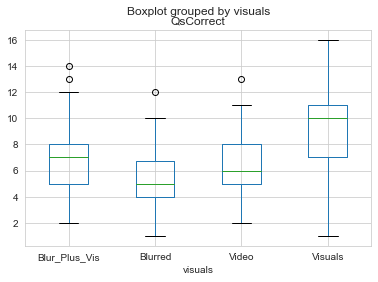

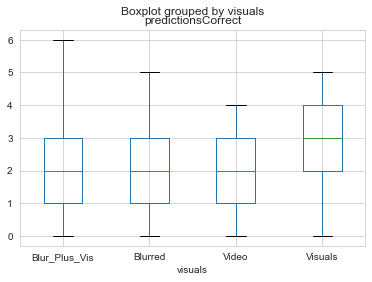

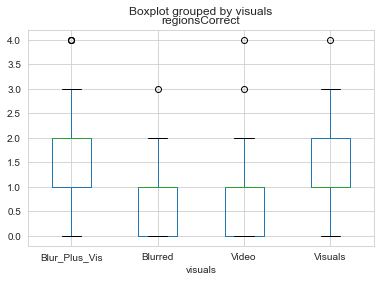

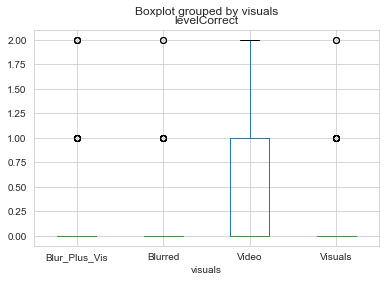

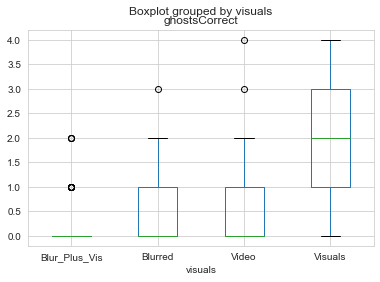

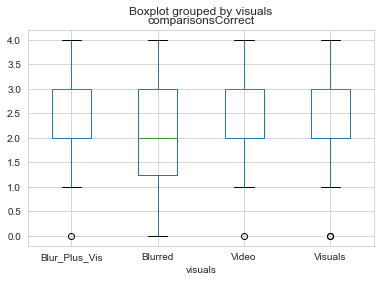

In [37]:
slimDF.boxplot(column='QsCorrect',by='visuals')
plt.show()

slimDF.boxplot(column='predictionsCorrect',by='visuals')
plt.show()

slimDF.boxplot(column='regionsCorrect',by='visuals')
plt.show()

slimDF.boxplot(column='levelCorrect',by='visuals')
plt.show()

slimDF.boxplot(column='ghostsCorrect',by='visuals')
plt.show()

slimDF.boxplot(column='comparisonsCorrect',by='visuals')
plt.show()

In [38]:
taskDF.likertCatVar = pd.Categorical(taskDF.Response, categories=['Very False','Somewhat False','Neutral','Somewhat True','Very True'], ordered=True)
taskDF.confCatVar = pd.Categorical(taskDF.Response, categories=['Not at All Confident','Not Confident','Neutral','Somewhat Confident','Completely Confident'], ordered=True)


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


245
[' EATING ALL FOUR POWER PILLS AS QUICKLY AS POSSIBLE'
 ' EATING THE MOST GHOSTS' ' STAYING ALIVE THE LONGEST'
 ' ALWAYS PRESERVING A POWER PILL FOR USE ON THE SECOND OR THIRD LIFE'
 ' EATING POWER PILLS AS QUICKLY AS POSSIBLE'
 ' PRESERVING AT LEAST ONE POWER PILL FOR USE ON ITS SECOND AND THIRD LIFE']
245
['Difficult' 'Easy']
[' EAT ALL FOUR POWER PILLS \n AS QUICKLY AS POSSIBLE'
 ' EAT THE MOST GHOSTS' ' STAY ALIVE THE LONGEST'
 ' PRESERVE AT LEAST ONE POWER PILL FOR \n USE ON ITS SECOND AND THIRD LIFE']


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

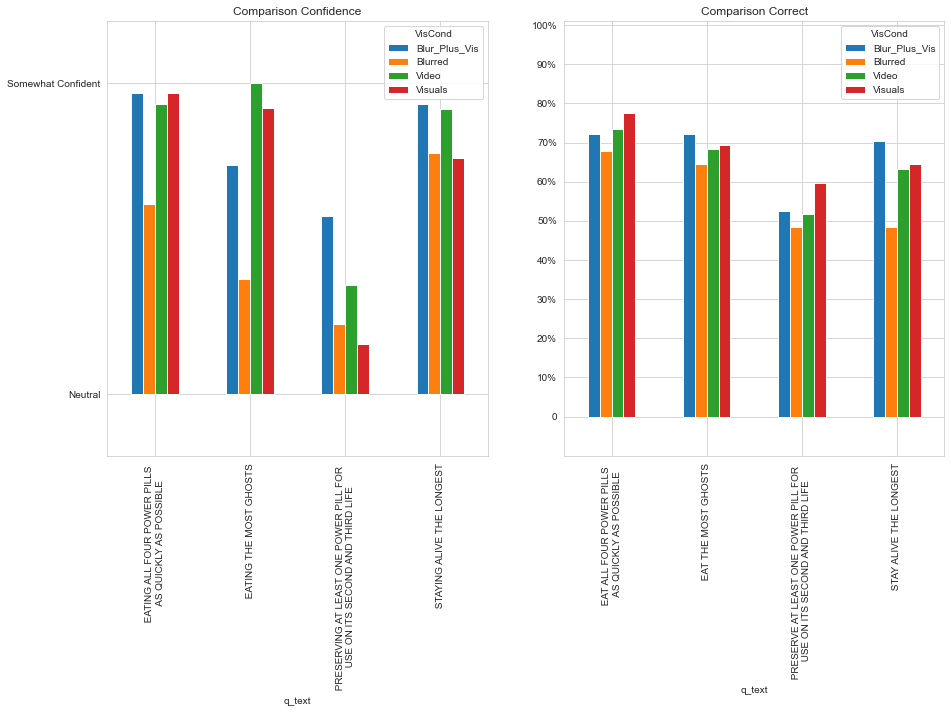

245
[' EATING ALL FOUR POWER PILLS AS QUICKLY AS POSSIBLE'
 ' EATING THE MOST GHOSTS' ' STAYING ALIVE THE LONGEST'
 ' ALWAYS PRESERVING A POWER PILL FOR USE ON THE SECOND OR THIRD LIFE'
 ' EATING POWER PILLS AS QUICKLY AS POSSIBLE'
 ' PRESERVING AT LEAST ONE POWER PILL FOR USE ON ITS SECOND AND THIRD LIFE']
118
['Easy']
[' EAT ALL FOUR POWER PILLS \n AS QUICKLY AS POSSIBLE'
 ' EAT THE MOST GHOSTS' ' STAY ALIVE THE LONGEST'
 ' PRESERVE AT LEAST ONE POWER PILL FOR \n USE ON ITS SECOND AND THIRD LIFE']


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

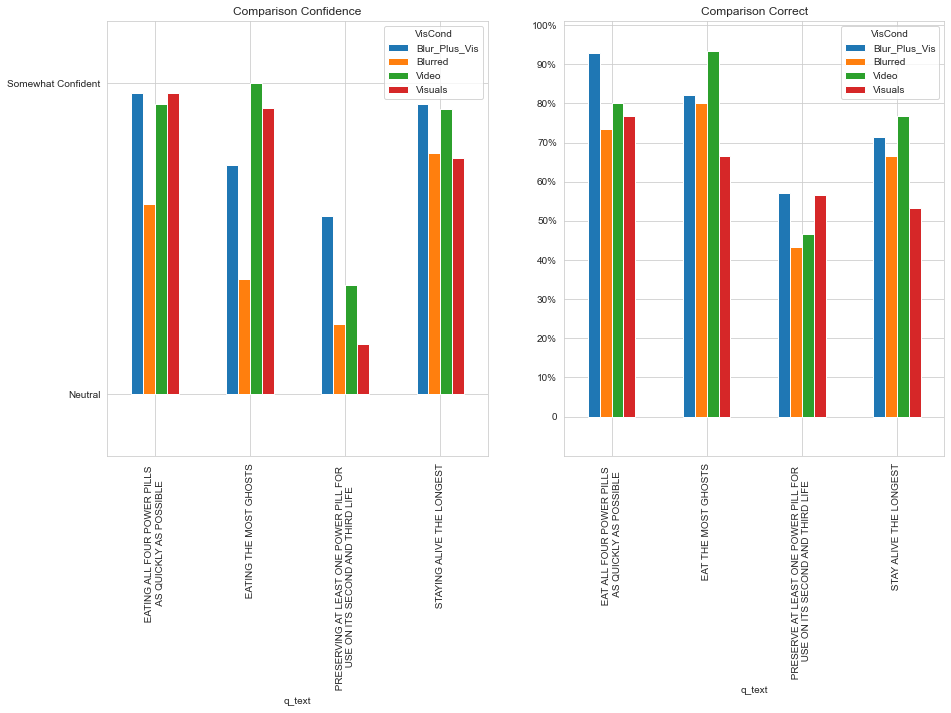

127
['Difficult']
[' EATING ALL FOUR POWER PILLS AS QUICKLY AS POSSIBLE'
 ' EATING THE MOST GHOSTS' ' STAYING ALIVE THE LONGEST'
 ' ALWAYS PRESERVING A POWER PILL FOR USE ON THE SECOND OR THIRD LIFE'
 ' EATING POWER PILLS AS QUICKLY AS POSSIBLE'
 ' PRESERVING AT LEAST ONE POWER PILL FOR USE ON ITS SECOND AND THIRD LIFE']
245


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

[' EAT ALL FOUR POWER PILLS \n AS QUICKLY AS POSSIBLE'
 ' EAT THE MOST GHOSTS' ' STAY ALIVE THE LONGEST'
 ' PRESERVE AT LEAST ONE POWER PILL FOR \n USE ON ITS SECOND AND THIRD LIFE']


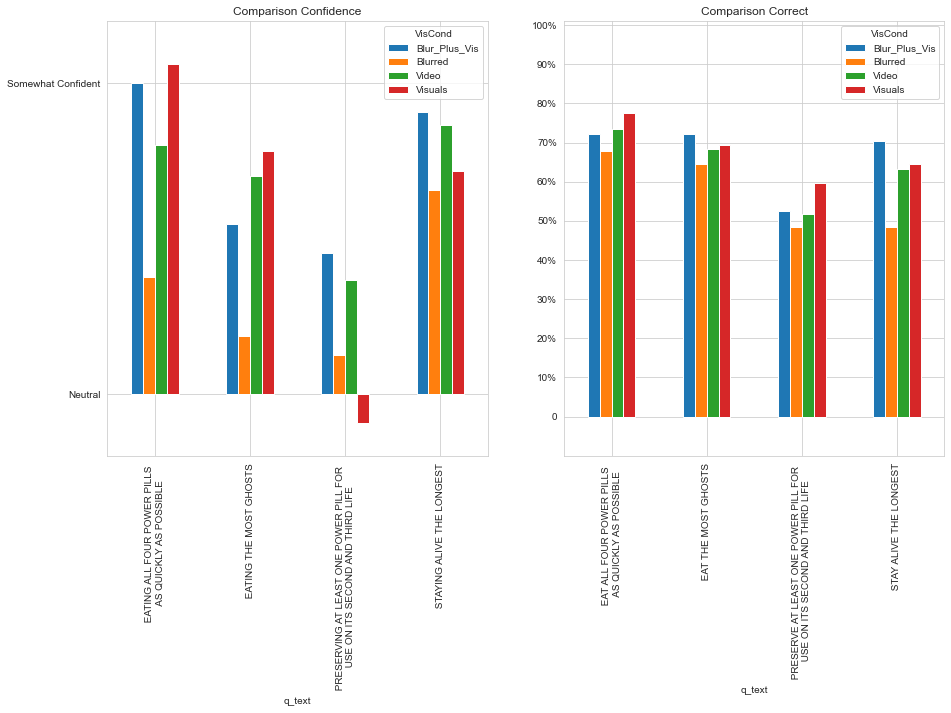

In [39]:
from pandas.api.types import CategoricalDtype

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))

################### PLOT ONE
temp1 = taskDF.query('ZoneType == "response_button_text" & display == "CompareConfidenceVidOnly"')
# if (len(temp1)>0):

#     for t_index, t in enumerate(temp1.q_num.unique()):
#         contents = re.split('<h1>|</h1>',t)
#         print("looking for " + str(contents[1]))
#         temp2 = temp1[temp1['q_num']==t]
#         if (len(temp1)>0):
print(len(temp1.ParticipantPrivateID.unique()))
temp3 = temp1[['Response','VisCond','Text1']]
cat_type = {'Not at All Confident':-2,'Not Confident':-1,'Neutral':0,'Somewhat Confident':1,'Completely Confident':2}
temp3['confCatVar'] = temp3.Response.map(lambda x: cat_type[x]) 
#             print(temp3)
# get text of task alone:
temp3['q_text'] = temp3['Text1'].str.split('task of|:').str[1]
print(temp3.q_text.unique())
temp3['q_text'] = temp3['q_text'].str.replace('ALWAYS PRESERVING A POWER PILL FOR USE ON THE SECOND OR THIRD LIFE','PRESERVING AT LEAST ONE POWER PILL FOR \n USE ON ITS SECOND AND THIRD LIFE')
temp3['q_text'] = temp3['q_text'].str.replace('EATING POWER PILLS AS QUICKLY AS POSSIBLE','EATING ALL FOUR POWER PILLS \n AS QUICKLY AS POSSIBLE')
temp3['q_text'] = temp3['q_text'].str.replace('PRESERVING AT LEAST ONE POWER PILL FOR USE ON ITS SECOND AND THIRD LIFE','PRESERVING AT LEAST ONE POWER PILL FOR \n USE ON ITS SECOND AND THIRD LIFE')
temp3['q_text'] = temp3['q_text'].str.replace('EATING ALL FOUR POWER PILLS AS QUICKLY AS POSSIBLE','EATING ALL FOUR POWER PILLS \n AS QUICKLY AS POSSIBLE')

df_pivot = pd.pivot_table(
    temp3, 
    values="confCatVar",
    index="q_text",
    columns="VisCond", 
    aggfunc=np.mean
)

ax = df_pivot.plot(kind="bar", title = str("Comparison Confidence"), ax=axes[0], ylim=(-0.2,1.2))
ax.set_yticks([0,1])
ax.set_yticklabels(['Neutral','Somewhat Confident'])

################### PLOT TWO
temp1 = taskDF.query('ZoneType == "response_button_text" & display == "CompareSectionVideoOnly"')
# if (len(temp1)>0):

#     for t_index, t in enumerate(temp1.q_num.unique()):
#         contents = re.split('<h1>|</h1>',t)
#         print("looking for " + str(contents[1]))
#         temp2 = temp1[temp1['q_num']==t]
#         if (len(temp1)>0):
print(len(temp1.ParticipantPrivateID.unique()))
print(temp1.LVL.unique())
temp3 = temp1[['Correct','VisCond','Text1']]
# cat_type = {'Not at All Confident':-2,'Not Confident':-1,'Neutral':0,'Somewhat Confident':1,'Completely Confident':2}
# temp3['confCatVar'] = temp3.Response.map(lambda x: cat_type[x]) 
#             print(temp3)
# get text of task alone:
temp3['q_text'] = temp3['Text1'].str.split('needed to|,').str[1]

temp3['q_text'] = temp3['q_text'].str.replace('ALWAYS PRESERVE A POWER PILL FOR USE ON ITS SECOND OR THIRD LIFE','PRESERVE AT LEAST ONE POWER PILL FOR \n USE ON ITS SECOND AND THIRD LIFE')
temp3['q_text'] = temp3['q_text'].str.replace('PRESERVE AT LEAST ONE POWER PILL FOR USE ON ITS SECOND AND THIRD LIFEE','PRESERVE AT LEAST ONE POWER PILL FOR \n USE ON ITS SECOND AND THIRD LIFE')
temp3['q_text'] = temp3['q_text'].str.replace('EAT POWER PILLS AS QUICKLY AS POSSIBLE','EAT ALL FOUR POWER PILLS AS QUICKLY AS POSSIBLE')
temp3['q_text'] = temp3['q_text'].str.replace('PRESERVE AT LEAST ONE POWER PILL FOR USE ON ITS SECOND AND THIRD LIFE','PRESERVE AT LEAST ONE POWER PILL FOR \n USE ON ITS SECOND AND THIRD LIFE')
temp3['q_text'] = temp3['q_text'].str.replace('EAT ALL FOUR POWER PILLS AS QUICKLY AS POSSIBLE','EAT ALL FOUR POWER PILLS \n AS QUICKLY AS POSSIBLE')



print(temp3.q_text.unique())

df_pivot = pd.pivot_table(
    temp3, 
    values="Correct",
    index="q_text",
    columns="VisCond", 
    aggfunc=np.mean
)

ax = df_pivot.plot(kind="bar", title = str("Comparison Correct"), ax=axes[1], ylim=(-0.101,1.01))
ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
ax.set_yticklabels(['0','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))

################### PLOT ONE
temp1 = taskDF.query('ZoneType == "response_button_text" & display == "CompareConfidenceVidOnly"')
# if (len(temp1)>0):

#     for t_index, t in enumerate(temp1.q_num.unique()):
#         contents = re.split('<h1>|</h1>',t)
#         print("looking for " + str(contents[1]))
#         temp2 = temp1[temp1['q_num']==t]
#         if (len(temp1)>0):
print(len(temp1.ParticipantPrivateID.unique()))
temp3 = temp1[['Response','VisCond','Text1']]
cat_type = {'Not at All Confident':-2,'Not Confident':-1,'Neutral':0,'Somewhat Confident':1,'Completely Confident':2}
temp3['confCatVar'] = temp3.Response.map(lambda x: cat_type[x]) 
#             print(temp3)
# get text of task alone:
temp3['q_text'] = temp3['Text1'].str.split('task of|:').str[1]
print(temp3.q_text.unique())
temp3['q_text'] = temp3['q_text'].str.replace('ALWAYS PRESERVING A POWER PILL FOR USE ON THE SECOND OR THIRD LIFE','PRESERVING AT LEAST ONE POWER PILL FOR \n USE ON ITS SECOND AND THIRD LIFE')
temp3['q_text'] = temp3['q_text'].str.replace('EATING POWER PILLS AS QUICKLY AS POSSIBLE','EATING ALL FOUR POWER PILLS \n AS QUICKLY AS POSSIBLE')
temp3['q_text'] = temp3['q_text'].str.replace('PRESERVING AT LEAST ONE POWER PILL FOR USE ON ITS SECOND AND THIRD LIFE','PRESERVING AT LEAST ONE POWER PILL FOR \n USE ON ITS SECOND AND THIRD LIFE')
temp3['q_text'] = temp3['q_text'].str.replace('EATING ALL FOUR POWER PILLS AS QUICKLY AS POSSIBLE','EATING ALL FOUR POWER PILLS \n AS QUICKLY AS POSSIBLE')

df_pivot = pd.pivot_table(
    temp3, 
    values="confCatVar",
    index="q_text",
    columns="VisCond", 
    aggfunc=np.mean
)

ax = df_pivot.plot(kind="bar", title = str("Comparison Confidence"), ax=axes[0], ylim=(-0.2,1.2))
ax.set_yticks([0,1])
ax.set_yticklabels(['Neutral','Somewhat Confident'])

################### PLOT TWO
temp1 = taskDF.query('ZoneType == "response_button_text" & display == "CompareSectionVideoOnly" & LVL == "Easy"')
# if (len(temp1)>0):

#     for t_index, t in enumerate(temp1.q_num.unique()):
#         contents = re.split('<h1>|</h1>',t)
#         print("looking for " + str(contents[1]))
#         temp2 = temp1[temp1['q_num']==t]
#         if (len(temp1)>0):
print(len(temp1.ParticipantPrivateID.unique()))
print(temp1.LVL.unique())
temp3 = temp1[['Correct','VisCond','Text1']]
# cat_type = {'Not at All Confident':-2,'Not Confident':-1,'Neutral':0,'Somewhat Confident':1,'Completely Confident':2}
# temp3['confCatVar'] = temp3.Response.map(lambda x: cat_type[x]) 
#             print(temp3)
# get text of task alone:
temp3['q_text'] = temp3['Text1'].str.split('needed to|,').str[1]

temp3['q_text'] = temp3['q_text'].str.replace('ALWAYS PRESERVE A POWER PILL FOR USE ON ITS SECOND OR THIRD LIFE','PRESERVE AT LEAST ONE POWER PILL FOR \n USE ON ITS SECOND AND THIRD LIFE')
temp3['q_text'] = temp3['q_text'].str.replace('PRESERVE AT LEAST ONE POWER PILL FOR USE ON ITS SECOND AND THIRD LIFEE','PRESERVE AT LEAST ONE POWER PILL FOR \n USE ON ITS SECOND AND THIRD LIFE')
temp3['q_text'] = temp3['q_text'].str.replace('EAT POWER PILLS AS QUICKLY AS POSSIBLE','EAT ALL FOUR POWER PILLS AS QUICKLY AS POSSIBLE')
temp3['q_text'] = temp3['q_text'].str.replace('PRESERVE AT LEAST ONE POWER PILL FOR USE ON ITS SECOND AND THIRD LIFE','PRESERVE AT LEAST ONE POWER PILL FOR \n USE ON ITS SECOND AND THIRD LIFE')
temp3['q_text'] = temp3['q_text'].str.replace('EAT ALL FOUR POWER PILLS AS QUICKLY AS POSSIBLE','EAT ALL FOUR POWER PILLS \n AS QUICKLY AS POSSIBLE')



print(temp3.q_text.unique())

df_pivot = pd.pivot_table(
    temp3, 
    values="Correct",
    index="q_text",
    columns="VisCond", 
    aggfunc=np.mean
)

ax = df_pivot.plot(kind="bar", title = str("Comparison Correct"), ax=axes[1], ylim=(-0.101,1.01))
ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
ax.set_yticklabels(['0','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))

################### PLOT ONE
temp1 = taskDF.query('ZoneType == "response_button_text" & display == "CompareConfidenceVidOnly" & LVL=="Difficult"')
# if (len(temp1)>0):

#     for t_index, t in enumerate(temp1.q_num.unique()):
#         contents = re.split('<h1>|</h1>',t)
#         print("looking for " + str(contents[1]))
#         temp2 = temp1[temp1['q_num']==t]
#         if (len(temp1)>0):
print(len(temp1.ParticipantPrivateID.unique()))
print(temp1.LVL.unique())
temp3 = temp1[['Response','VisCond','Text1']]
cat_type = {'Not at All Confident':-2,'Not Confident':-1,'Neutral':0,'Somewhat Confident':1,'Completely Confident':2}
temp3['confCatVar'] = temp3.Response.map(lambda x: cat_type[x]) 
#             print(temp3)
# get text of task alone:
temp3['q_text'] = temp3['Text1'].str.split('task of|:').str[1]
print(temp3.q_text.unique())
temp3['q_text'] = temp3['q_text'].str.replace('ALWAYS PRESERVING A POWER PILL FOR USE ON THE SECOND OR THIRD LIFE','PRESERVING AT LEAST ONE POWER PILL FOR \n USE ON ITS SECOND AND THIRD LIFE')
temp3['q_text'] = temp3['q_text'].str.replace('EATING POWER PILLS AS QUICKLY AS POSSIBLE','EATING ALL FOUR POWER PILLS \n AS QUICKLY AS POSSIBLE')
temp3['q_text'] = temp3['q_text'].str.replace('PRESERVING AT LEAST ONE POWER PILL FOR USE ON ITS SECOND AND THIRD LIFE','PRESERVING AT LEAST ONE POWER PILL FOR \n USE ON ITS SECOND AND THIRD LIFE')
temp3['q_text'] = temp3['q_text'].str.replace('EATING ALL FOUR POWER PILLS AS QUICKLY AS POSSIBLE','EATING ALL FOUR POWER PILLS \n AS QUICKLY AS POSSIBLE')

df_pivot = pd.pivot_table(
    temp3, 
    values="confCatVar",
    index="q_text",
    columns="VisCond", 
    aggfunc=np.mean
)

ax = df_pivot.plot(kind="bar", title = str("Comparison Confidence"), ax=axes[0], ylim=(-0.2,1.2))
ax.set_yticks([0,1])
ax.set_yticklabels(['Neutral','Somewhat Confident'])

################### PLOT TWO
temp1 = taskDF.query('ZoneType == "response_button_text" & display == "CompareSectionVideoOnly"')
# if (len(temp1)>0):

#     for t_index, t in enumerate(temp1.q_num.unique()):
#         contents = re.split('<h1>|</h1>',t)
#         print("looking for " + str(contents[1]))
#         temp2 = temp1[temp1['q_num']==t]
#         if (len(temp1)>0):
print(len(temp1.ParticipantPrivateID.unique()))
temp3 = temp1[['Correct','VisCond','Text1']]
# cat_type = {'Not at All Confident':-2,'Not Confident':-1,'Neutral':0,'Somewhat Confident':1,'Completely Confident':2}
# temp3['confCatVar'] = temp3.Response.map(lambda x: cat_type[x]) 
#             print(temp3)
# get text of task alone:
temp3['q_text'] = temp3['Text1'].str.split('needed to|,').str[1]

temp3['q_text'] = temp3['q_text'].str.replace('ALWAYS PRESERVE A POWER PILL FOR USE ON ITS SECOND OR THIRD LIFE','PRESERVE AT LEAST ONE POWER PILL FOR \n USE ON ITS SECOND AND THIRD LIFE')
temp3['q_text'] = temp3['q_text'].str.replace('PRESERVE AT LEAST ONE POWER PILL FOR USE ON ITS SECOND AND THIRD LIFEE','PRESERVE AT LEAST ONE POWER PILL FOR \n USE ON ITS SECOND AND THIRD LIFE')
temp3['q_text'] = temp3['q_text'].str.replace('EAT POWER PILLS AS QUICKLY AS POSSIBLE','EAT ALL FOUR POWER PILLS AS QUICKLY AS POSSIBLE')
temp3['q_text'] = temp3['q_text'].str.replace('PRESERVE AT LEAST ONE POWER PILL FOR USE ON ITS SECOND AND THIRD LIFE','PRESERVE AT LEAST ONE POWER PILL FOR \n USE ON ITS SECOND AND THIRD LIFE')
temp3['q_text'] = temp3['q_text'].str.replace('EAT ALL FOUR POWER PILLS AS QUICKLY AS POSSIBLE','EAT ALL FOUR POWER PILLS \n AS QUICKLY AS POSSIBLE')



print(temp3.q_text.unique())

df_pivot = pd.pivot_table(
    temp3, 
    values="Correct",
    index="q_text",
    columns="VisCond", 
    aggfunc=np.mean
)

ax = df_pivot.plot(kind="bar", title = str("Comparison Correct"), ax=axes[1], ylim=(-0.101,1.01))
ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
ax.set_yticklabels(['0','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
plt.show()

In [40]:
for v_index, vis in enumerate(taskDF.VisCond.unique()):
    temp = taskDF[taskDF['VisCond']==vis]
    temp1 = temp.query('ZoneType == "response_button_text" & display == "likerts"')
    temp1['q_text'] = temp1['Text1'].str.split('The|Agent').str[1]
    print("\n" + str(vis))
    print(temp1.q_text.unique())

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.



Blur_Plus_Vis
[' charts were helpful in answering the questions about '
 ' scenarios shown were helpful in answering the questions about '
 ' blurring of the video was helpful in answering the questions about '
 ' information shown was sufficient for understanding ']

Visuals
[' charts contained sufficient detail for me to answer the questions about '
 ' charts contained irrelevant or distracting details.</h3>'
 ' information shown was sufficient for understanding ']

Blurred
[' scenarios shown were helpful in answering the questions about '
 ' blurring of the video was helpful in answering the questions about '
 ' information shown was sufficient for understanding ']

Video
[' scenarios shown were helpful in answering the questions about '
 ' scenarios contained irrelevant or distracting details.</h3>'
 ' information shown was sufficient for understanding ']


245
[' charts were helpful in answering the questions '
 ' scenarios shown were helpful in answering the questions '
 ' blurring of the video was helpful in answering the questions '
 ' information shown was sufficient for understanding '
 ' charts contained sufficient detail for me to answer the questions '
 ' charts contained irrelevant or distracting details'
 ' scenarios contained irrelevant or distracting details']
[' contained irrelevant or distracting details']
                tot1Perc   tot2Perc    totPerc
visuals                                       
Blur_Plus_Vis  23.387097  28.427419  34.112903
Blurred        20.161290  19.354839  27.258065
Video          25.793651  22.420635  32.222222
Visuals        39.112903  39.516129  45.000000


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

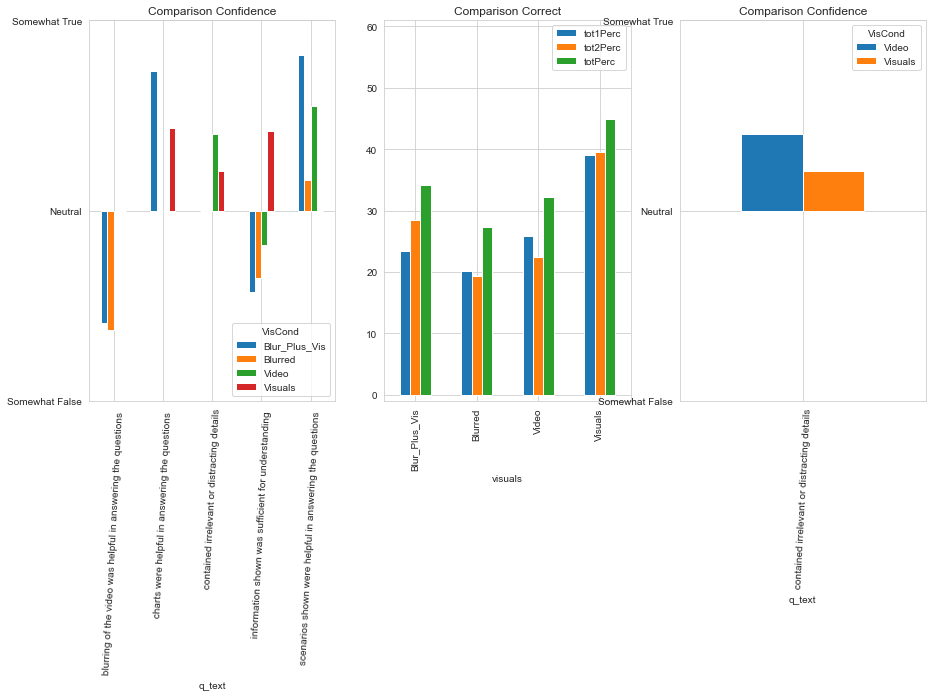

In [41]:
from pandas.api.types import CategoricalDtype

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,7))
plt.rc('xtick', labelsize=17)    # fontsize of the tick labels
################### PLOT ONE
temp1 = taskDF.query('ZoneType == "response_button_text" & display == "likerts"')
# if (len(temp1)>0):

#     for t_index, t in enumerate(temp1.q_num.unique()):
#         contents = re.split('<h1>|</h1>',t)
#         print("looking for " + str(contents[1]))
#         temp2 = temp1[temp1['q_num']==t]
#         if (len(temp1)>0):
print(len(temp1.ParticipantPrivateID.unique()))
temp3 = temp1[['Response','VisCond','Text1']]

cat_type = {'Very False':-2,'Somewhat False':-1,'Neutral':0,'Somewhat True':1,'Very True':2}
temp3['confCatVar'] = temp3.Response.map(lambda x: cat_type[x]) 
#             print(temp3)
# get text of task alone:
temp3['q_text'] = temp3['Text1'].str.split('Agent').str[0]
temp3['q_text'] = temp3['q_text'].str.split('The|about').str[1]
temp3['q_text'] = temp3['q_text'].str.split('.</h3>').str[0]
print(temp3.q_text.unique())
# temp3['q_text'] = temp3['q_text'].str.replace('charts were helpful in answering the questions','helpful in answering the questions')
# temp3['q_text'] = temp3['q_text'].str.replace('scenarios shown were helpful in answering the questions','helpful in answering the questions')
# temp3['q_text'] = temp3['q_text'].str.replace('blurring of the video was helpful in answering the questions','helpful in answering the questions')
# temp3['q_text'] = temp3['q_text'].str.replace('information shown was sufficient for understanding','contained sufficient detail')
temp3['q_text'] = temp3['q_text'].str.replace('charts contained sufficient detail for me to answer the questions','charts were helpful in answering the questions')
temp3['q_text'] = temp3['q_text'].str.replace('charts contained irrelevant or distracting details','contained irrelevant or distracting details')
temp3['q_text'] = temp3['q_text'].str.replace('scenarios contained irrelevant or distracting details','contained irrelevant or distracting details')

# temp4 = temp3.query('q_text != " contained irrelevant or distracting details"')
temp4 = temp3.copy()
df_pivot = pd.pivot_table(
    temp4, 
    values="confCatVar",
    index="q_text",
    columns="VisCond", 
    aggfunc=np.mean
)

ax = df_pivot.plot(kind="bar", title = str("Comparison Confidence"), ax=axes[0], rot=87, ylim=(-0.5,0.5))
ax.set_yticks([-0.5,0,0.5])
ax.set_yticklabels(['Somewhat False','Neutral','Somewhat True'])




################### PLOT TWO
temp4 = temp3.query('q_text == " contained irrelevant or distracting details"')
print(temp4.q_text.unique())
df_pivot = pd.pivot_table(
    temp4, 
    values="confCatVar",
    index="q_text",
    columns="VisCond", 
    aggfunc=np.mean
)

ax = df_pivot.plot(kind="bar", title = str("Comparison Confidence"), ax=axes[2], rot=87, ylim=(-0.5,0.5))
ax.set_yticks([-0.5,0,0.5])
ax.set_yticklabels(['Somewhat False','Neutral','Somewhat True'])







################### PLOT THREE
temp3 = slimDF[['visuals','tot1Perc','tot2Perc','totPerc']]
print(temp3.groupby('visuals').mean())
# if (len(temp1)>0):

#     for t_index, t in enumerate(temp1.q_num.unique()):
#         contents = re.split('<h1>|</h1>',t)
#         print("looking for " + str(contents[1]))
#         temp2 = temp1[temp1['q_num']==t]
#         if (len(temp1)>0):
# print(len(temp1.ParticipantPrivateID.unique()))
# temp3 = temp1[['num_correct','VisCond','Text1']]
# cat_type = {'Not at All Confident':-2,'Not Confident':-1,'Neutral':0,'Somewhat Confident':1,'Completely Confident':2}
# temp3['confCatVar'] = temp3.Response.map(lambda x: cat_type[x]) 
#             print(temp3)
# get text of task alone:
# temp3['q_text'] = temp3['Text1'].str.split('were|about').str[1]

# temp3['q_text'] = temp3['q_text'].str.replace('ALWAYS PRESERVE A POWER PILL FOR USE ON ITS SECOND OR THIRD LIFE','PRESERVE AT LEAST ONE POWER PILL FOR USE ON ITS SECOND AND THIRD LIFE')
# temp3['q_text'] = temp3['q_text'].str.replace('PRESERVE AT LEAST ONE POWER PILL FOR USE ON ITS SECOND AND THIRD LIFEE','PRESERVE AT LEAST ONE POWER PILL FOR USE ON ITS SECOND AND THIRD LIFE')
# temp3['q_text'] = temp3['q_text'].str.replace('EAT POWER PILLS AS QUICKLY AS POSSIBLE','EAT ALL FOUR POWER PILLS AS QUICKLY AS POSSIBLE')


# df_pivot = pd.pivot_table(
#     temp3, 
#     values="num_correct",
#     index="q_text",
#     columns="visuals", 
#     aggfunc=np.mean
# )

ax = temp3.groupby('visuals').mean().plot(kind="bar", title = str("Comparison Correct"), ax=axes[1], ylim=(-1,61))
# ax.set_yticks([0,1,2,3,4,5,6,7,8,9,100])
# ax.set_yticklabels(['0','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
plt.show()









245
[' charts were helpful in answering the questions '
 ' scenarios shown were helpful in answering the questions '
 ' blurring of the video was helpful in answering the questions '
 ' information shown was sufficient for understanding '
 ' charts contained sufficient detail for me to answer the questions '
 ' charts contained irrelevant or distracting details'
 ' scenarios contained irrelevant or distracting details']
[' charts were helpful in answering the questions '
 ' contained irrelevant or distracting details'
 ' information shown was sufficient for understanding '
 ' scenarios shown were helpful in answering the questions '
 ' blurring of the video was helpful in answering the questions ']


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

[' charts were helpful in answering the questions '
 ' scenarios shown were helpful in answering the questions '
 ' blurring of the video was helpful in answering the questions '
 ' information shown was sufficient for understanding '
 ' contained irrelevant or distracting details']


[Text(0, -0.5, 'Somewhat False'),
 Text(0, 0.0, 'Neutral'),
 Text(0, 0.5, 'Somewhat True')]

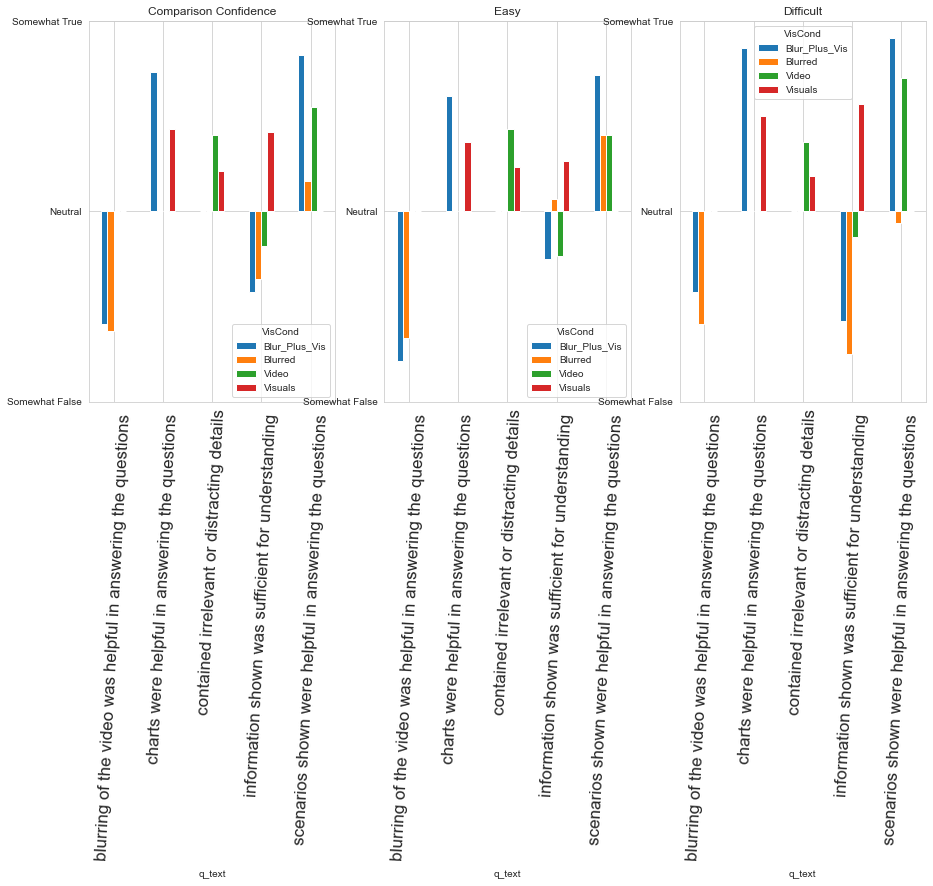

In [42]:
from pandas.api.types import CategoricalDtype

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,7))
plt.rc('xtick', labelsize=17)    # fontsize of the tick labels
################### PLOT ONE
temp1 = taskDF.query('ZoneType == "response_button_text" & display == "likerts"')
# if (len(temp1)>0):

#     for t_index, t in enumerate(temp1.q_num.unique()):
#         contents = re.split('<h1>|</h1>',t)
#         print("looking for " + str(contents[1]))
#         temp2 = temp1[temp1['q_num']==t]
#         if (len(temp1)>0):
print(len(temp1.ParticipantPrivateID.unique()))
temp3 = temp1[['Response','VisCond','Text1','LVL']]

cat_type = {'Very False':-2,'Somewhat False':-1,'Neutral':0,'Somewhat True':1,'Very True':2}
temp3['confCatVar'] = temp3.Response.map(lambda x: cat_type[x]) 
#             print(temp3)
# get text of task alone:
temp3['q_text'] = temp3['Text1'].str.split('Agent').str[0]
temp3['q_text'] = temp3['q_text'].str.split('The|about').str[1]
temp3['q_text'] = temp3['q_text'].str.split('.</h3>').str[0]
print(temp3.q_text.unique())
# temp3['q_text'] = temp3['q_text'].str.replace('charts were helpful in answering the questions','helpful in answering the questions')
# temp3['q_text'] = temp3['q_text'].str.replace('scenarios shown were helpful in answering the questions','helpful in answering the questions')
# temp3['q_text'] = temp3['q_text'].str.replace('blurring of the video was helpful in answering the questions','helpful in answering the questions')
# temp3['q_text'] = temp3['q_text'].str.replace('information shown was sufficient for understanding','contained sufficient detail')
temp3['q_text'] = temp3['q_text'].str.replace('charts contained sufficient detail for me to answer the questions','charts were helpful in answering the questions')
temp3['q_text'] = temp3['q_text'].str.replace('charts contained irrelevant or distracting details','contained irrelevant or distracting details')
temp3['q_text'] = temp3['q_text'].str.replace('scenarios contained irrelevant or distracting details','contained irrelevant or distracting details')

# temp4 = temp3.query('q_text != " contained irrelevant or distracting details"')
temp4 = temp3.copy()
df_pivot = pd.pivot_table(
    temp4, 
    values="confCatVar",
    index="q_text",
    columns="VisCond", 
    aggfunc=np.mean
)

ax = df_pivot.plot(kind="bar", title = str("Comparison Confidence"), ax=axes[0], rot=87, ylim=(-0.5,0.5))
ax.set_yticks([-0.5,0,0.5])
ax.set_yticklabels(['Somewhat False','Neutral','Somewhat True'])




################### PLOT TWO
temp4 = temp3.query('LVL == "Easy"')
print(temp4.q_text.unique())
df_pivot = pd.pivot_table(
    temp4, 
    values="confCatVar",
    index="q_text",
    columns="VisCond", 
    aggfunc=np.mean
)

ax = df_pivot.plot(kind="bar", title = str("Comparison Confidence"), ax=axes[1], rot=87, ylim=(-0.5,0.5))
ax.set_yticks([-0.5,0,0.5])
ax.set_title("Easy")
ax.set_yticklabels(['Somewhat False','Neutral','Somewhat True'])







################### PLOT THREE
temp4 = temp3.query('LVL == "Difficult"')
print(temp4.q_text.unique())
df_pivot = pd.pivot_table(
    temp4, 
    values="confCatVar",
    index="q_text",
    columns="VisCond", 
    aggfunc=np.mean
)

ax = df_pivot.plot(kind="bar", title = str("Comparison Confidence"), ax=axes[2], rot=87, ylim=(-0.5,0.5))
ax.set_yticks([-0.5,0,0.5])
ax.set_title("Difficult")
ax.set_yticklabels(['Somewhat False','Neutral','Somewhat True'])










In [43]:
d = {'Very False':1,'Somewhat False':2,'Neutral':3,'Somewhat True':4,'Very True':5,
     'Not at All Confident':1,'Not Confident':2,'Neutral':3,'Somewhat Confident':4,'Completely Confident':5}


taskDF['task_rating'] = taskDF.Response.map(d.get)
# # taskDF['task_rating'] = taskDF['task_rating'].fillna(0)

# fig, ax = plt.subplots()
# taskDF.task_rating.value_counts().plot(kind='bar', ax=ax)
# ## alternatively:
# # aiDF_S.groupby(by='AIrating').count().plot(kind='bar', ax=ax)
# fig.tight_layout()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


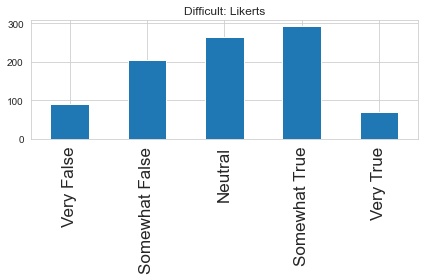

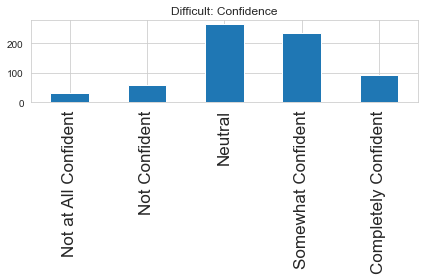

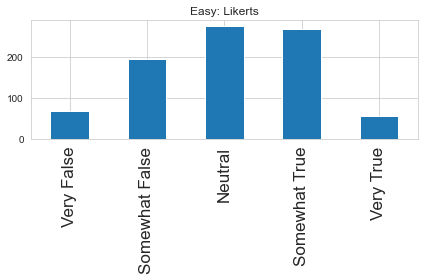

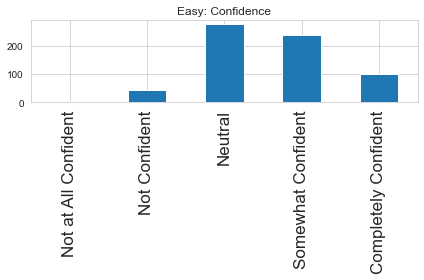

In [44]:
for lvl_index, lvl in enumerate(taskDF.LVL.unique()):
    temp = taskDF[taskDF['LVL']==lvl]
    
    temp.likertCatVar = pd.Categorical(temp.Response, categories=['Very False','Somewhat False','Neutral','Somewhat True','Very True'], ordered=True)

    temp.confCatVar = pd.Categorical(temp.Response, categories=['Not at All Confident','Not Confident','Neutral','Somewhat Confident','Completely Confident'], ordered=True)

    if len(temp) > 0:
        fig, ax = plt.subplots()
        temp.likertCatVar.value_counts().plot(kind="bar", ax=ax)
        ax.set_title(temp.LVL.unique()[0] + ": Likerts")
        ## alternatively:
        # aiDF_S.groupby(by='AIrating').count().plot(kind='bar', ax=ax)
        fig.tight_layout()
        
        fig, ax = plt.subplots()
        temp.confCatVar.value_counts().plot(kind="bar", ax=ax)
        ax.set_title(temp.LVL.unique()[0] + ": Confidence")
        ## alternatively:
        # aiDF_S.groupby(by='AIrating').count().plot(kind='bar', ax=ax)
        fig.tight_layout()

In [45]:
# temp1 = taskDF.query('ZoneType == "response_button_text" & display != "AttnCheck" & display != "Img_4_Buttons" & display != "CompareConfidenceVidOnly"')
# temp1['RT_sec'] = temp1['ReactionTime']/1000/60

# ax = temp1.plot.bar(x='SpreadsheetRow', y='RT_sec', rot=0)

Difficult

Blur_Plus_Vis
display
6_buttons                  0.053030
Attn1                      0.833333
Attn2                      1.000000
CompareSectionVideoOnly    0.590909
NextLvl                    0.463636
Prediction                 0.363636
Regions                    0.386364
Name: Correct, dtype: float64


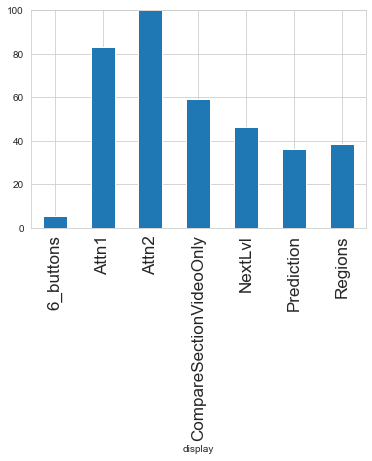

Easy
Easy

Visuals
display
6_buttons                  0.408333
Attn1                      1.000000
Attn2                      1.000000
CompareSectionVideoOnly    0.633333
NextLvl                    0.442308
Prediction                 0.422222
Regions                    0.316667
Name: Correct, dtype: float64


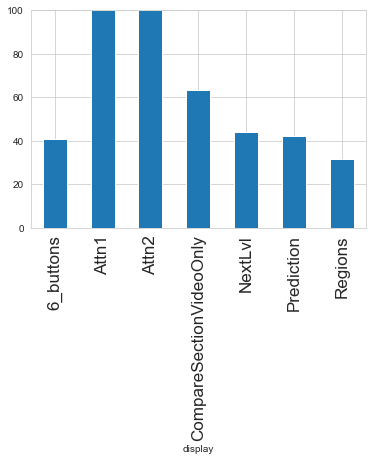

Difficult
Easy

Blurred
display
6_buttons                  0.116667
Attn1                      1.000000
Attn2                      1.000000
CompareSectionVideoOnly    0.658333
NextLvl                    0.441176
Prediction                 0.277778
Regions                    0.183333
Name: Correct, dtype: float64


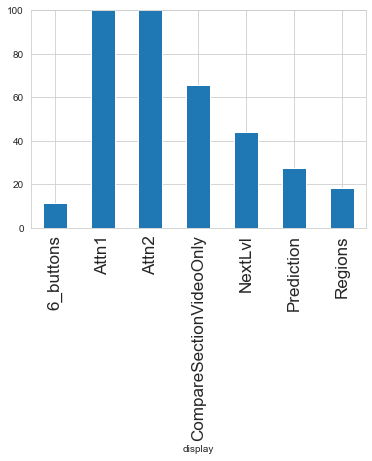

Difficult
Difficult

Video
display
6_buttons                  0.166667
Attn1                      0.928571
Attn2                      1.000000
CompareSectionVideoOnly    0.541667
NextLvl                    0.509434
Prediction                 0.361111
Regions                    0.208333
Name: Correct, dtype: float64


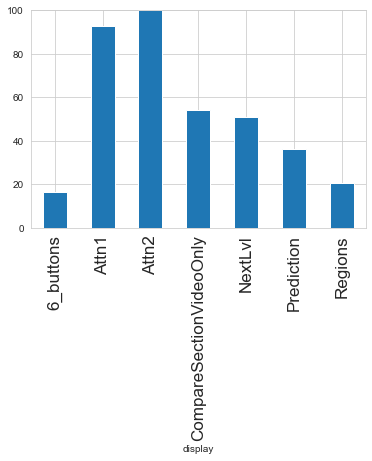

Easy


In [46]:
for v_index, vis in enumerate(taskDF.VisCond.unique()):
    temp = taskDF[taskDF['VisCond']==vis]
    for d_index, diff in enumerate(temp.LVL.unique()):
        temp = temp[temp['LVL']==diff]
        print(diff)
        temp1 = temp.query('ZoneType == "response_button_text" & display != "AttnCheck" & display != "Img_4_Buttons" & display != "CompareConfidenceVidOnly" & display != "likerts"')

        if len(temp1) > 0:
            print("\n" + str(vis))
            grp = temp1.groupby("display")
            print(grp['Correct'].sum()/grp['Correct'].count())
            (grp['Correct'].mean()*100).plot(kind="bar")
            plt.ylim((0,100))
            plt.show()

In [47]:
# for v_index, vis in enumerate(taskDF.VisCond.unique()):
#     temp = taskDF[taskDF['VisCond']==vis]
#     temp1 = temp.query('ZoneType == "response_button_text" & display != "AttnCheck" & display != "CompareSectionVideoOnly" & display != "Img_4_Buttons" & display != "CompareConfidenceVidOnly" & display != "likerts"')
    
#     for a_index, ag in enumerate(temp1.ParticipantOS.unique()):
#         temp2 = temp1[temp1['ParticipantOS']==ag]
#         if len(temp2) > 0:
#             print("\n" + str(vis) + " " + str(ag))
#             grp = temp2.groupby("display")
#             print(grp['Correct'].sum()/grp['Correct'].count())
#             (grp['Correct'].mean()*100).plot(kind="bar")
#             plt.ylim((0,100))
#             plt.show()


25.0
Participants: 3
Conditions: ['Blur_Plus_Vis' 'Visuals' 'Blurred']
display
6_buttons     0.333333
NextLvl       0.333333
Prediction    0.166667
Regions       0.083333
Name: Correct, dtype: float64


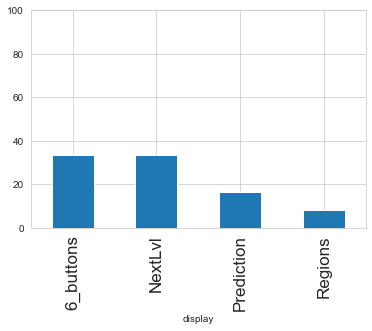


28.0
Participants: 1
Conditions: ['Blur_Plus_Vis']
display
6_buttons     0.000000
NextLvl       0.000000
Prediction    0.666667
Regions       0.250000
Name: Correct, dtype: float64


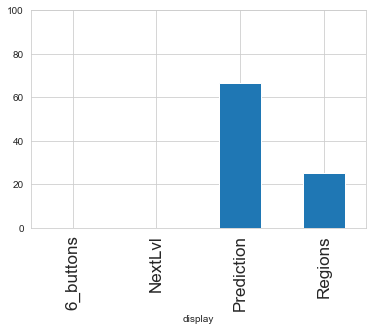


38.0
Participants: 1
Conditions: ['Blur_Plus_Vis']
display
6_buttons     0.0
NextLvl       0.0
Prediction    0.0
Regions       0.0
Name: Correct, dtype: float64


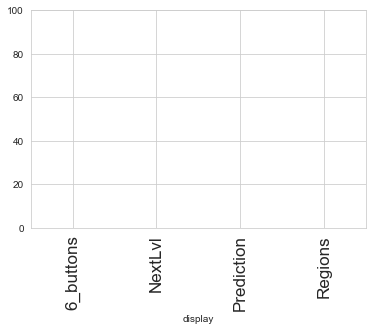


40.0
Participants: 1
Conditions: ['Visuals']
display
6_buttons     0.750000
NextLvl       0.500000
Prediction    0.833333
Regions       0.500000
Name: Correct, dtype: float64


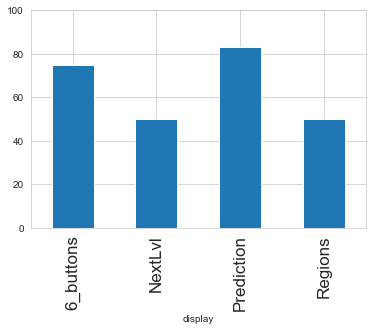


41.0
Participants: 83
Conditions: ['Blur_Plus_Vis' 'Video' 'Blurred' 'Visuals']
display
6_buttons     0.237952
NextLvl       0.545181
Prediction    0.377510
Regions       0.274096
Name: Correct, dtype: float64


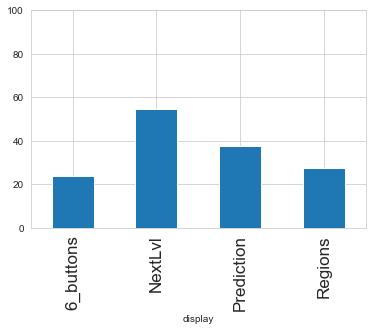


43.0
Participants: 96
Conditions: ['Blurred' 'Blur_Plus_Vis' 'Visuals' 'Video']
display
6_buttons     0.184896
NextLvl       0.554688
Prediction    0.354167
Regions       0.265625
Name: Correct, dtype: float64


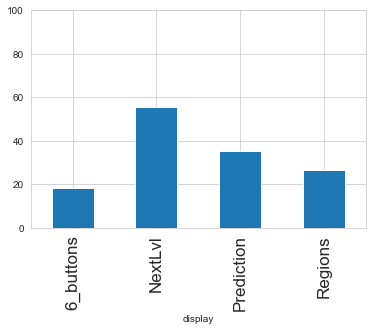


54.0
Participants: 60
Conditions: ['Blur_Plus_Vis' 'Video' 'Blurred' 'Visuals']
display
6_buttons     0.166667
Attn1         0.950000
Attn2         0.983333
NextLvl       0.108333
Prediction    0.394444
Regions       0.291667
Name: Correct, dtype: float64


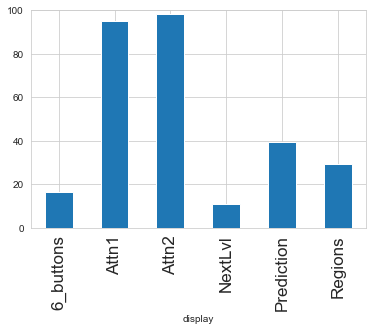

In [48]:
for v_index, vis in enumerate(taskDF.TaskVersion.unique()):
    temp = taskDF[taskDF['TaskVersion']==vis]
    temp1 = temp.query('ZoneType == "response_button_text" & display != "AttnCheck" & display != "CompareSectionVideoOnly" & display != "Img_4_Buttons" & display != "CompareConfidenceVidOnly" & display != "likerts"')
    
    temp2=temp1.copy()
    if len(temp2) > 0:
        print("\n" + str(vis))
        print("Participants: " + str(len(temp2.ParticipantPrivateID.unique())))
        print("Conditions: " + str(temp2.VisCond.unique()))
        grp = temp2.groupby("display")
        print(grp['Correct'].sum()/grp['Correct'].count())
        (grp['Correct'].mean()*100).plot(kind="bar")
        plt.ylim((0,100))
        plt.show()

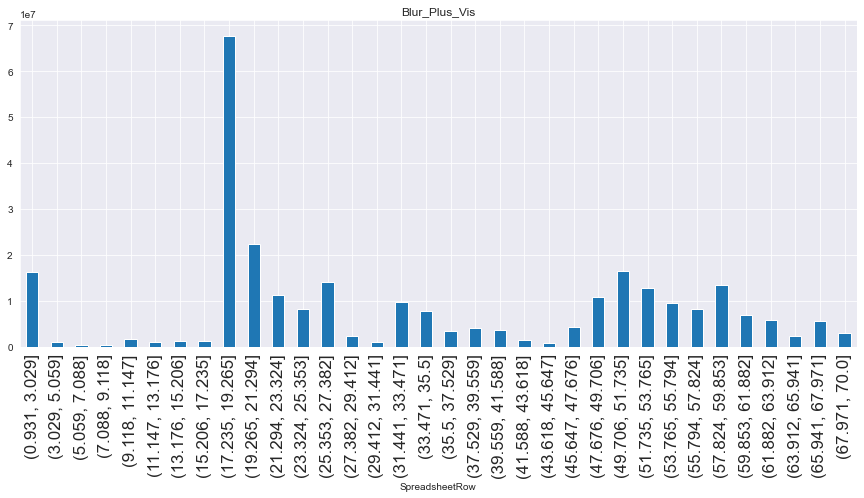

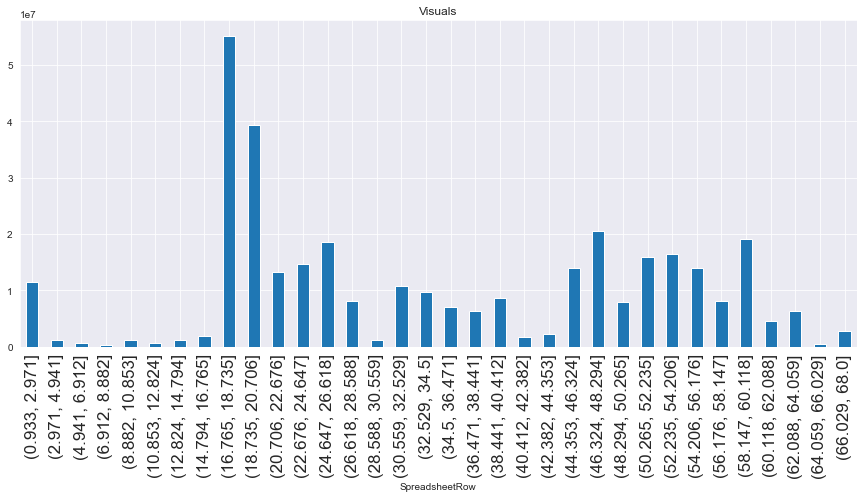

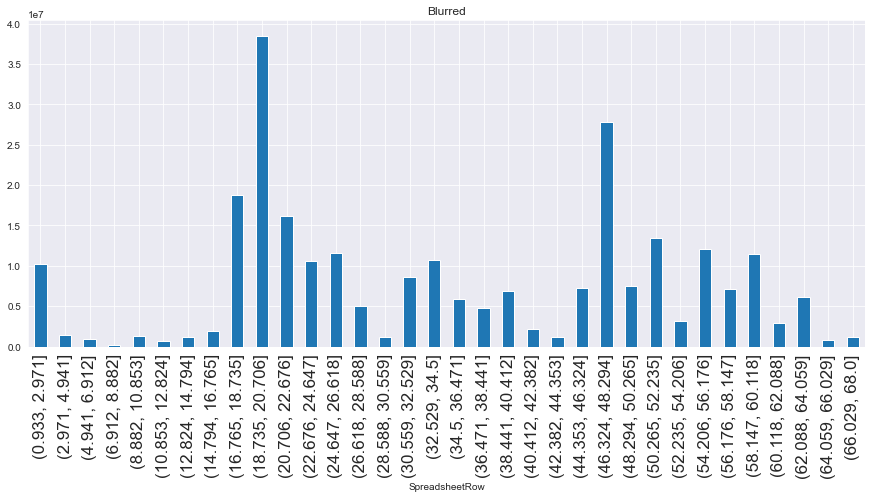

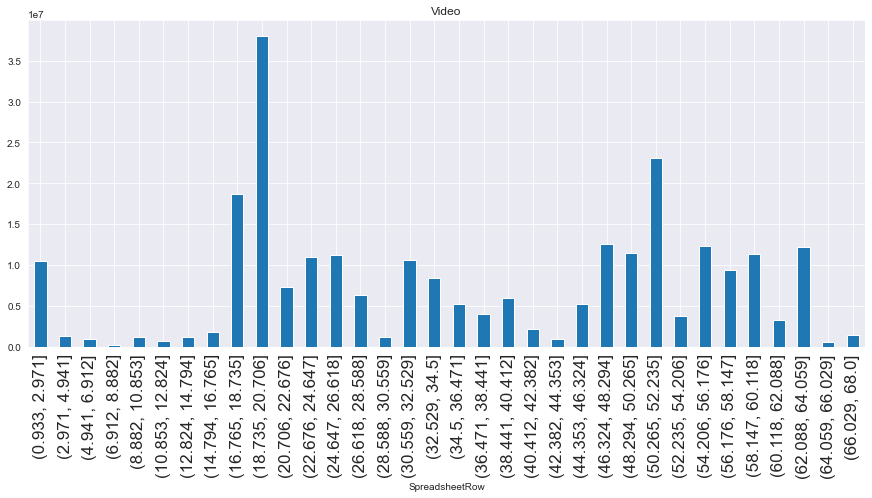

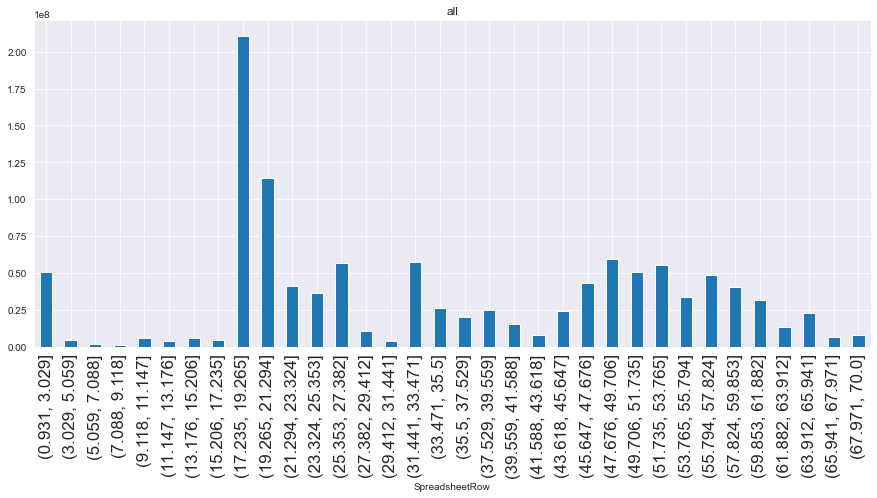

In [49]:
nBins = 34

sns.set_style("darkgrid")
for vis in taskDF.VisCond.unique():
    plt.figure(figsize=(15,6))
    temp = taskDF[taskDF['VisCond']==vis]
    if (len(temp.ParticipantNum)>1):
        my_bins = np.linspace(temp.SpreadsheetRow.min(),temp.SpreadsheetRow.max(),nBins)
        temp.groupby(pd.cut(temp.SpreadsheetRow, bins =nBins)).sum()['ReactionTime'].plot(kind='bar')
        plt.title(vis)
        plt.show()


temp = taskDF.copy()
plt.figure(figsize=(15,6))
my_bins = np.linspace(temp.SpreadsheetRow.min(),temp.SpreadsheetRow.max(),nBins)
temp.groupby(pd.cut(temp.SpreadsheetRow, bins =nBins)).sum()['ReactionTime'].plot(kind='bar')
plt.title("all")
plt.show()

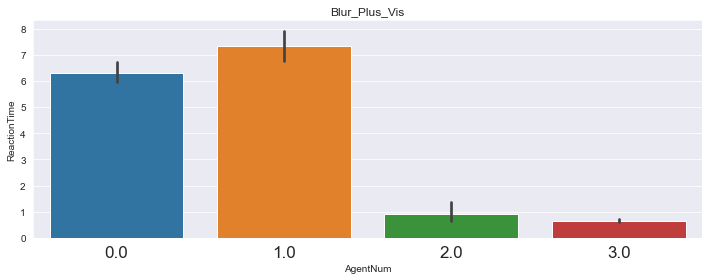

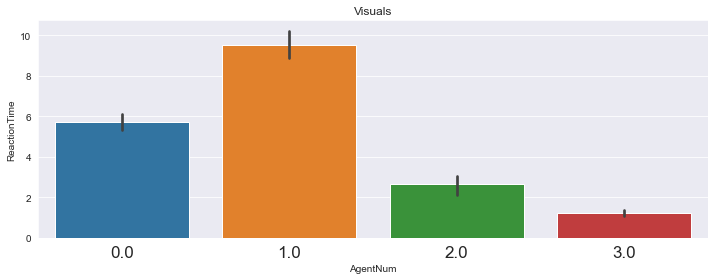

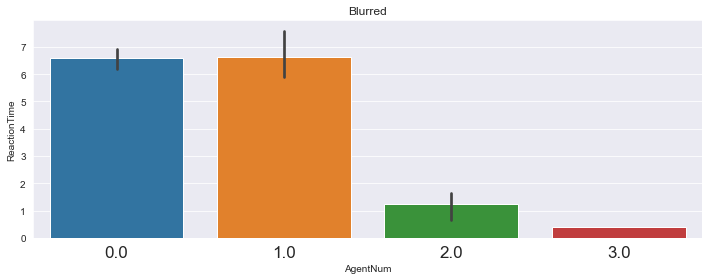

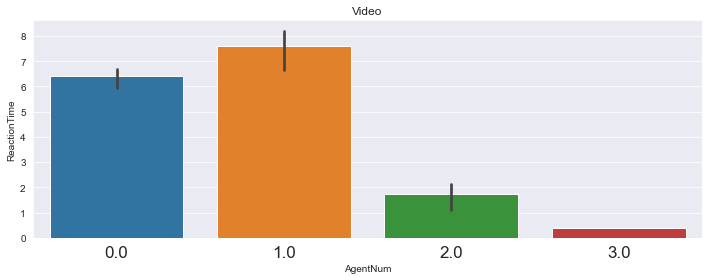

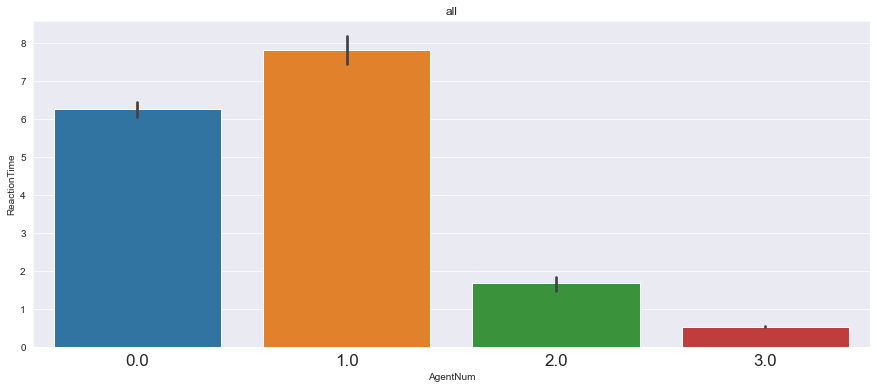

In [50]:
nBins = 3

from numpy import median
taskDF['ReactionTime'] = taskDF['ReactionTime']/1000

sns.set_style("darkgrid")
for vis in taskDF.VisCond.unique():
    plt.figure(figsize=(12,4))
    temp = taskDF[taskDF['VisCond']==vis]
    if (len(temp.ParticipantNum)>1):
        sns.barplot(x="AgentNum", y="ReactionTime", data=temp, estimator=median)
#         plt.ylim((0,2))
        plt.title(vis)
        plt.show()


temp = taskDF.copy()
plt.figure(figsize=(15,6))
sns.barplot(x="AgentNum", y="ReactionTime", data=temp, estimator=median)
plt.title("all")
plt.show()

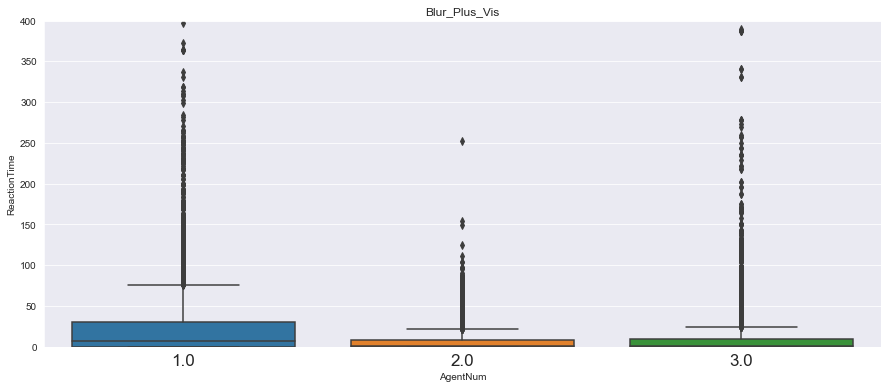

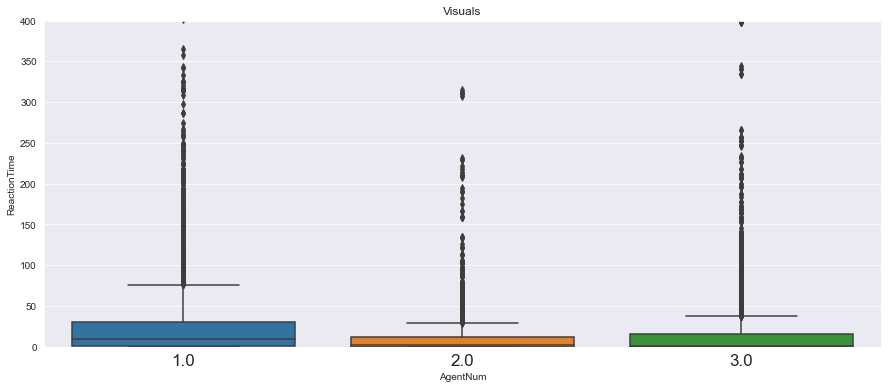

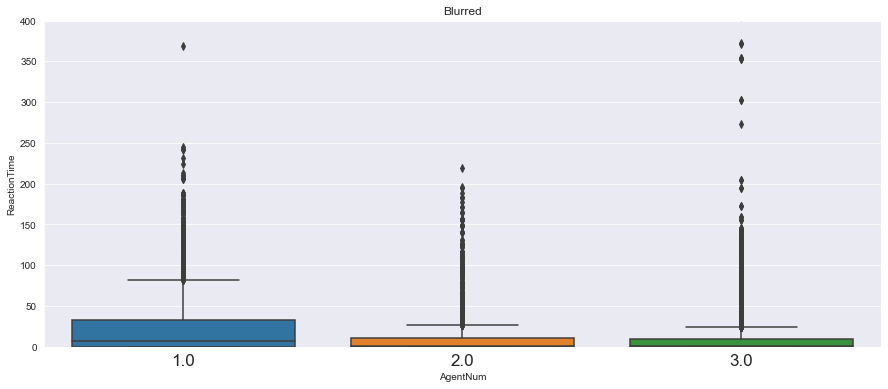

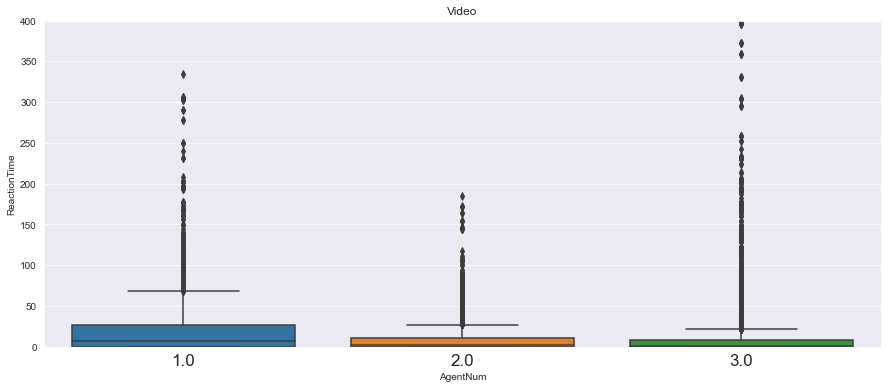

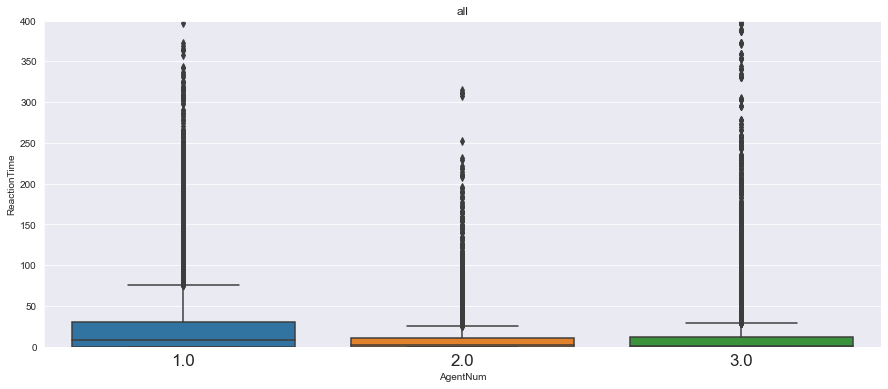

In [51]:
nBins = 3

from numpy import median

sns.set_style("darkgrid")
for vis in taskDF.VisCond.unique():
    plt.figure(figsize=(15,6))
    temp = taskDF[taskDF['VisCond']==vis]
    temp = temp[temp['AgentNum'] > 0]
    if (len(temp.ParticipantNum)>1):
        sns.boxplot(x="AgentNum", y="ReactionTime", data=temp)
        plt.title(vis)
        plt.ylim((0,400))
        plt.show()


temp = taskDF.copy()
plt.figure(figsize=(15,6))
temp = temp[temp['AgentNum'] > 0]
sns.boxplot(x="AgentNum", y="ReactionTime", data=temp)
plt.title("all")
plt.ylim((0,400))
plt.show()

In [52]:
slimDF.agg(['mean','max','min','std'])

,ParticipantPrivateID,difficulty,visuals,agents,QsTotal,QsCorrect,Agent_QsTotal,Agent_QsCorrect,Agent_QsWO_GhostsTotal,Agent_QsWO_GhostsCorrect,...,Part2,Part3,MediaAI,HomeAI,AtWorkAI,ClassOnAI,DevelopAI,NoneAI,OtherAI,AIrating
max,3534721.0,Easy,Visuals,s23_p23,20.0,16.000000,16.0,13.000000,12.0,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Positive
min,3109877.0,Difficult,Blur_Plus_Vis,23_300,20.0,1.000000,16.0,0.000000,12.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Extremely Positive
mean,NaN,NaN,NaN,NaN,20.0,6.927711,16.0,4.361446,12.0,3.562249,...,0.842105,0.947368,0.722892,0.385542,0.148594,0.088353,0.032129,0.064257,0.008032,NaN
std,NaN,NaN,NaN,NaN,0.0,2.766956,0.0,2.425893,0.0,1.923208,...,0.365383,0.223750,0.448472,0.487703,0.356405,0.284380,0.176697,0.245704,0.089441,NaN


In [53]:
disp_list = taskDF.SpreadsheetRow.unique()
idx = taskDF.ParticipantPrivateID.unique()
idx = idx[idx != 'nan']
lst = []

taskDF.set_index('EventIndex')

for p_index, pID in enumerate(idx):
    temp = taskDF[taskDF['ParticipantPrivateID']==pID]
    p_list = []
    for disp_index, disp in enumerate(disp_list):
        temp1 = temp[temp['SpreadsheetRow']==disp]
        temp1.sort_values('EventIndex')
        if (len(temp1) > 0):
            # for this display, subtract first timestamp from last timestamp to get total seconds spent
            diff = temp1.iloc[-1]['UTCTimestamp']-temp1.iloc[0]['UTCTimestamp']
#             print(diff)
            p_list.append(diff)
        else:
            p_list.append(0)
    lst.append(p_list)
        
# print(lst)  
timeDF = pd.DataFrame(lst, columns = disp_list, index = idx)  

print(timeDF.head(3))

KeyboardInterrupt: 

In [ ]:
timeDF.mean().plot(kind="bar",figsize=(15,4))

In [ ]:
cols = slimDF.columns.values.tolist()

cols = set(cols) - {'LocalDate_x', 'ExperimentID_x','ScheduleID_x', 'ParticipantPublicID_x', 'ParticipantStartingGroup_x', 'ParticipantStatus_x', 'ParticipantCompletionCode_x', 'ParticipantExternalSessionID_x', 'ParticipantDeviceType_x', 'ParticipantDevice_x', 'ParticipantOS_x', 'ParticipantBrowser_x', 'ParticipantMonitorSize_x', 'ParticipantViewportSize_x', 'Checkpoint_x',
                   'TaskVersion_x', 'randomiser_8rx4_x', 'randomiser_ndwh_x', 'randomiser_fy7r_x', 'randomiser_7vb5_x', 'checkpoint_ph4w_x', 'checkpoint_drrq_x', 'randomiser_vfim_x', 'checkpoint_6gsl_x', 'checkpoint_apgi_x', 'randomiser_k74v_x', 'randomiser_zcqq_x', 'randomiser_9z8b_x', 'randomiser_xnr7_x', 'randomiser_l6v8_x', 'randomiser_dwc2_x', 'Randomisequestionnaireelements?_x',
                   'ENDQUESTIONNAIRE_x', 'branch_4zei_x', 'EventIndex_y', 
                   'LocalTimezone_y', 'LocalDate_y', 'ExperimentID_y', 'ExperimentVersion_y', 'TreeNodeKey_y', 'RepeatKey_y', 'ScheduleID_y', 'ParticipantPublicID_y', 'ParticipantStartingGroup_y', 'ParticipantStatus_y', 'ParticipantCompletionCode_y', 'ParticipantExternalSessionID_y', 'ParticipantDeviceType_y', 'ParticipantDevice_y', 'ParticipantOS_y', 'ParticipantBrowser_y', 'ParticipantMonitorSize_y', 'ParticipantViewportSize_y', 'Checkpoint_y', 'TaskName_y', 'TaskVersion_y', 'randomiser_8rx4_y', 'randomiser_ndwh_y', 'randomiser_fy7r_y', 'randomiser_7vb5_y', 'checkpoint_ph4w_y', 'checkpoint_drrq_y', 'randomiser_vfim_y', 'checkpoint_6gsl_y', 'checkpoint_apgi_y', 'randomiser_k74v_y', 'randomiser_zcqq_y', 'randomiser_9z8b_y', 'randomiser_xnr7_y', 'randomiser_l6v8_y', 'randomiser_dwc2_y', 'Randomisequestionnaireelements?_y', 
                    'ENDQUESTIONNAIRE_y', 'branch_4zei_y','LocalTimestamp_y'}
cols = list(cols)
print(len(cols))
cols2 = cols[:42]
cols = cols[42:]

# print(cols)
# print(cols2)

In [ ]:
# for index, i in enumerate(cols):
#     x = cols[index]
#     y = cols2[index]
#     print(x)
#     print(y)
#     try:
#         sns.regplot(x, y, data=slimDF)
#         plt.title(str(cols[index]) + " vs " + str(cols2[index]))
#         plt.show()
#     except:
#         print("An exception occurred")

In [ ]:
# sns.regplot('education_level_quantised', 'totPerc', data=slimDF[slimDF['education_level_quantised']])
# plt.show()

sns.regplot('education_level_quantised', 'regPerc', data=slimDF, logx=True)
plt.show()
sns.regplot('education_level_quantised', 'regPerc', data=slimDF, robust=True)
plt.show()

sns.regplot('education_level_quantised', 'predPerc', data=slimDF, logx=True)
plt.show()
sns.regplot('education_level_quantised', 'predPerc', data=slimDF, robust=True)
plt.show()

sns.regplot('education_level_quantised', 'ghostPerc', data=slimDF, logx=True)
plt.show()
sns.regplot('education_level_quantised', 'ghostPerc', data=slimDF, robust=True)
plt.show()

sns.regplot('education_level_quantised', 'lvlPerc', data=slimDF, logx=True)
plt.show()
sns.regplot('education_level_quantised', 'lvlPerc', data=slimDF, robust=True)
plt.show()

sns.regplot('education_level_quantised', 'compPerc', data=slimDF, logx=True)
plt.show()
sns.regplot('education_level_quantised', 'compPerc', data=slimDF, robust=True)
plt.show()

In [ ]:
# datamap = {
#     1: "Extremely negative", 
#     2: "Negative", 
#     3: "Neutral", 
#     4: "Positive", 
#     5: "Extremely Positive"
# }

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(15,5))

sns.regplot('ai_opinion_quantised', 'regPerc', data=slimDF,ax=ax1)
ax1.set_title("Linear Regions")
sns.regplot('ai_opinion_quantised', 'regPerc', data=slimDF, logx=True,ax=ax2)
ax2.set_title("LogX Regions")
sns.regplot('ai_opinion_quantised', 'regPerc', data=slimDF, robust=True,ax=ax3)
ax3.set_title("Robust Regions")
plt.show()

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(15,5))

sns.regplot('ai_opinion_quantised', 'ghostPerc', data=slimDF,ax=ax1)
ax1.set_title("Linear Ghosts")
sns.regplot('ai_opinion_quantised', 'ghostPerc', data=slimDF, logx=True,ax=ax2)
ax2.set_title("LogX Ghosts")
sns.regplot('ai_opinion_quantised', 'ghostPerc', data=slimDF, robust=True,ax=ax3)
ax3.set_title("Robust Ghosts")
plt.show()

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(15,5))

sns.regplot('ai_opinion_quantised', 'lvlPerc', data=slimDF,ax=ax1)
ax1.set_title("Linear Level")
sns.regplot('ai_opinion_quantised', 'lvlPerc', data=slimDF, logx=True,ax=ax2)
ax2.set_title("LogX Level")
sns.regplot('ai_opinion_quantised', 'lvlPerc', data=slimDF, robust=True,ax=ax3)
ax3.set_title("Robust Level")
plt.show()

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(15,5))

sns.regplot('ai_opinion_quantised', 'predPerc', data=slimDF,ax=ax1)
ax1.set_title("Linear Predictions")
sns.regplot('ai_opinion_quantised', 'predPerc', data=slimDF, logx=True,ax=ax2)
ax2.set_title("LogX Predictions")
sns.regplot('ai_opinion_quantised', 'predPerc', data=slimDF, robust=True,ax=ax3)
ax3.set_title("Robust Predictions")
plt.show()

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(15,5))

sns.regplot('ai_opinion_quantised', 'compPerc', data=slimDF,ax=ax1)
ax1.set_title("Linear Comparisons")
sns.regplot('ai_opinion_quantised', 'compPerc', data=slimDF, logx=True,ax=ax2)
ax2.set_title("LogX Comparisons")
sns.regplot('ai_opinion_quantised', 'compPerc', data=slimDF, robust=True,ax=ax3)
ax3.set_title("Robust Comparisons")
plt.show()


In [ ]:
print(taskDF[taskDF['ParticipantPublicID']=='5c5e3853de929b0001a4d683'].ParticipantPrivateID.unique())

In [ ]:
print(slimDF[slimDF['ParticipantPrivateID']=='3407980.0'][['time_TOTAL','totPerc','visuals']])

In [ ]:
print(slimDF[slimDF['time_TOTAL']<(60*15)][['time_TOTAL','totPerc','visuals','ParticipantPrivateID']].mean())
print(".....................")
print(slimDF[slimDF['time_TOTAL']>(60*40)][['time_TOTAL','totPerc','visuals','ParticipantPrivateID']].mean())

In [ ]:
print(slimDF[(slimDF['totPerc']>(50)) & (slimDF['totPerc']<(60))][['time_TOTAL','timeTakenMain_AgentsOnly','totPerc','visuals','ParticipantPrivateID']])
print("..............................")
print(slimDF[slimDF['totPerc']>(65)][['time_TOTAL','timeTakenMain_AgentsOnly','totPerc','visuals','ParticipantPrivateID']])